In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 35)

## Loading and exploring data

In [4]:
df = pd.read_csv("data/data.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,45.566667,17.166667,55.20,NaN,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,NaN,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,45.890000,NaN,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,94.385668,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


df.tail()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

When I tried to convert the columns with object dtype to numeric dtype, it didn't work, because there seemed to be some strings in those columns. Lets check what those are :

In [6]:
mask = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]
print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['equipment_energy_consumption'].value_counts()

(912, 29)


equipment_energy_consumption
unknown    20
error      19
???        19
check      10
Name: count, dtype: int64

In [7]:
mask = pd.to_numeric(df['lighting_energy'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

# Now you can inspect them
print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['lighting_energy'].value_counts()

(864, 29)


lighting_energy
???        24
error      13
check       9
unknown     9
Name: count, dtype: int64

In [8]:
mask = pd.to_numeric(df['zone1_temperature'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['zone1_temperature'].value_counts()

(949, 29)


zone1_temperature
???        27
unknown    19
check      19
error      17
Name: count, dtype: int64

In [9]:
mask = pd.to_numeric(df['zone1_humidity'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

# Now you can inspect them
print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['zone1_humidity'].value_counts()

(888, 29)

zone1_humidity
error      25
???        23
unknown    22
check      17
Name: count, dtype: int64

In [10]:
mask = pd.to_numeric(df['zone2_temperature'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['zone2_temperature'].value_counts()

(923, 29)


zone2_temperature
error      23
???        19
check      16
unknown    12
Name: count, dtype: int64

All of these columns seem to have the same four strings in them. So lets just make them null values.

In [11]:

invalid_entries = ['error', '???', 'unknown', 'check']

# List of target columns
cols_to_clean = ['equipment_energy_consumption', 'lighting_energy', 
                 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']

# Replace all invalid string entries with np.nan across the target columns
df[cols_to_clean] = df[cols_to_clean].replace(invalid_entries, np.nan)

# Now convert columns to float
df[cols_to_clean] = df[cols_to_clean].astype(float)


In [12]:
df['equipment_energy_consumption'] = df['equipment_energy_consumption'].astype(float)
df['lighting_energy'] = df['lighting_energy'].astype(float)
df['zone1_temperature'] = df['zone1_temperature'].astype(float)
df['zone1_humidity'] = df['zone1_humidity'].astype(float)
df['zone2_temperature'] = df['zone2_temperature'].astype(float)



Now they have converted successfully.

In [13]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [14]:
df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [15]:
print("Shape of the dataset:", df.shape)
print("Size of the dataset:", df.size)
print("Number of unique values:", df.nunique())

Shape of the dataset: (16857, 29)
Size of the dataset: 488853
Number of unique values: timestamp                       16769
equipment_energy_consumption      126
lighting_energy                    15
zone1_temperature                 429
zone1_humidity                   2168
zone2_temperature                 834
zone2_humidity                   2166
zone3_temperature                 862
zone3_humidity                   1986
zone4_temperature                 923
zone4_humidity                   2445
zone5_temperature                1633
zone5_humidity                   6278
zone6_temperature                3144
zone6_humidity                   8359
zone7_temperature                1427
zone7_humidity                   4931
zone8_temperature                1672
zone8_humidity                   5382
zone9_temperature                 514
zone9_humidity                   2387
outdoor_temperature              1434
atmospheric_pressure             2106
outdoor_humidity                  607
w

1) It seems that there are only 16769 unique timestamps in the dataset while there are 16857 total values and 0 null values. This means there could be 188 duplicates, let's explore more to find out.
2) ['timestamp', 'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature'] - these columns do not belong to the correct datatype. So lets fix that.

In [16]:
df = df.drop_duplicates()
print("Shape of the dataset:", df.shape)
print("Size of the dataset:", df.size)
print("Number of unique values:", df.nunique())

Shape of the dataset: (16789, 29)
Size of the dataset: 486881
Number of unique values: timestamp                       16769
equipment_energy_consumption      126
lighting_energy                    15
zone1_temperature                 429
zone1_humidity                   2168
zone2_temperature                 834
zone2_humidity                   2166
zone3_temperature                 862
zone3_humidity                   1986
zone4_temperature                 923
zone4_humidity                   2445
zone5_temperature                1633
zone5_humidity                   6278
zone6_temperature                3144
zone6_humidity                   8359
zone7_temperature                1427
zone7_humidity                   4931
zone8_temperature                1672
zone8_humidity                   5382
zone9_temperature                 514
zone9_humidity                   2387
outdoor_temperature              1434
atmospheric_pressure             2106
outdoor_humidity                  607
w

It seems there are still 20 more columns with duplicates. Lets see what those are.

In [17]:
df['timestamp'].value_counts().head(20)

timestamp
2016-02-05 09:50:00    2
2016-02-04 11:20:00    2
2016-03-02 04:40:00    2
2016-02-13 15:50:00    2
2016-01-15 04:20:00    2
2016-02-26 20:00:00    2
2016-02-22 22:40:00    2
2016-01-18 18:10:00    2
2016-01-25 21:50:00    2
2016-03-28 17:40:00    2
2016-04-01 16:10:00    2
2016-04-05 21:10:00    2
2016-04-08 20:10:00    2
2016-04-15 01:10:00    2
2016-04-16 05:30:00    2
2016-04-20 15:30:00    2
2016-04-29 06:40:00    2
2016-05-02 10:30:00    2
2016-05-02 13:20:00    2
2016-05-04 04:30:00    2
Name: count, dtype: int64

In [18]:
duplicate_timestamps = df[df.duplicated('timestamp', keep=False)]

# Sort for easier inspection
duplicate_timestamps = duplicate_timestamps.sort_values(by='timestamp')

# View duplicates
duplicate_timestamps

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
501,2016-01-15 04:20:00,60.000000,0.0,22.823333,39.500000,21.823333,39.126667,21.290000,43.626667,18.323333,43.000000,18.290000,54.400000,NaN,95.366667,18.500000,42.626667,19.290000,-49.230000,17.290000,47.700000,2.800000,750.966667,80.666667,10.000000,NaN,-0.300000,27.708853,27.708853
502,2016-01-15 04:20:00,60.000000,0.0,22.823333,39.500000,21.823333,39.126667,21.290000,43.626667,18.323333,43.000000,18.290000,54.400000,NaN,95.366667,18.500000,42.626667,19.290000,49.230000,17.290000,47.700000,2.800000,750.966667,80.666667,10.000000,NaN,-0.300000,27.708853,27.708853
1019,2016-01-18 18:10:00,70.000000,10.0,19.100000,41.200000,17.823333,41.530000,19.390000,40.400000,18.500000,38.126667,17.390000,54.590000,-2.000000,90.143333,18.700000,34.500000,NaN,41.700000,17.000000,37.090000,-2.083333,756.600000,86.333333,3.000000,24.000000,-4.083333,44.782315,44.782315
1020,2016-01-18 18:10:00,70.000000,10.0,19.100000,41.200000,17.823333,41.530000,19.390000,40.400000,18.500000,-38.126667,17.390000,54.590000,-2.000000,90.143333,18.700000,34.500000,NaN,41.700000,17.000000,37.090000,-2.083333,756.600000,86.333333,3.000000,24.000000,-4.083333,44.782315,44.782315
2052,2016-01-25 21:50:00,80.000000,10.0,20.890000,43.433333,20.200000,42.590000,20.600000,44.693333,19.790000,44.326667,NaN,49.346111,8.990000,97.323333,17.981667,40.482222,18.975556,-9.059527,17.000000,47.090000,9.800000,763.683333,81.500000,4.166667,30.833333,6.700000,NaN,6.192611
2053,2016-01-25 21:50:00,80.000000,10.0,20.890000,43.433333,20.200000,-42.590000,20.600000,44.693333,19.790000,44.326667,NaN,49.346111,8.990000,97.323333,17.981667,40.482222,18.975556,-9.059527,17.000000,47.090000,9.800000,763.683333,81.500000,4.166667,30.833333,6.700000,NaN,6.192611
3434,2016-02-04 11:20:00,50.000000,0.0,20.890000,39.400000,19.150000,42.145000,21.790000,37.290000,19.790000,38.290000,19.290000,45.000000,11.263333,29.023333,20.000000,33.826667,4.502372,39.590000,19.600000,37.590000,8.333333,758.000000,77.666667,2.000000,53.000000,4.633333,10.504919,10.504919
3435,2016-02-04 11:20:00,1139.985693,20.0,8.726818,44.590000,19.790000,42.400000,21.295556,42.570000,20.500000,42.200000,18.600000,53.245000,5.530000,97.300000,18.200000,37.824737,20.533333,44.500000,18.200000,45.060000,5.500000,761.466667,96.000000,7.000000,51.333333,4.900000,11.967082,11.967082
3571,2016-02-05 09:50:00,50.000000,0.0,21.200000,46.260000,20.390000,NaN,21.745000,NaN,19.790000,46.826667,18.600000,-59.637778,9.300000,98.590000,18.390000,43.900000,20.500000,51.602222,18.600000,NaN,8.966667,763.700000,98.000000,4.166667,41.666667,8.666667,42.356488,42.356488
3570,2016-02-05 09:50:00,50.000000,0.0,21.200000,-46.260000,20.390000,NaN,21.745000,NaN,19.790000,46.826667,18.600000,59.637778,9.300000,98.590000,18.390000,43.900000,20.500000,51.602222,18.600000,NaN,8.966667,763.700000,98.000000,4.166667,41.666667,8.666667,42.356488,42.356488


we can see that some columns with duplilcate timestamps are the exact same except for some specific columns. Lets first make the negative values in columns like humidity and energy to positive values by takings abs(). Because these values cannot be negative.


In [19]:

# List of numeric columns (where negatives don't make sense)
columns_no_negatives = [
    'equipment_energy_consumption',
    'lighting_energy',
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity',
    'zone5_humidity', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_humidity',
    'atmospheric_pressure',
    'wind_speed',
    'visibility_index',
]

# Convert negative values to positive
df[columns_no_negatives] = df[columns_no_negatives].abs()

Since the columns like humidity are relative humidity percentages, they can't be negative. Similarly energy, consumption and other columns also have to be 0 or more. So we are changing their sign to keep the absolute values. But this results in having two copies of the same data. So lets keep the first and remove the duplicate.

In [20]:
df.drop_duplicates(subset=['timestamp'], keep='first', inplace=True)

In [21]:
print(df.shape[0])
print(df['timestamp'].nunique())

16769
16769


In [22]:
new_df = df.copy()

In [23]:
df['timestamp'].dtype

dtype('O')

In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60.0,77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,45.566667,17.166667,55.20,NaN,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,NaN,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,NaN,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,94.385668,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [25]:
df.index.dtype

dtype('<M8[ns]')

In [43]:
df.shape

(16769, 35)

In [47]:
print(df.isnull().sum()/df.shape[0]*100)

equipment_energy_consumption    5.420717
lighting_energy                 5.134474
zone1_temperature               5.623472
zone1_humidity                  5.283559
zone2_temperature               5.468424
zone2_humidity                  5.140438
zone3_temperature               4.752818
zone3_humidity                  5.223925
zone4_temperature               4.824378
zone4_humidity                  4.621623
zone5_temperature               4.943646
zone5_humidity                  4.752818
zone6_temperature               5.015207
zone6_humidity                  5.015207
zone7_temperature               4.693184
zone7_humidity                  4.770708
zone8_temperature               5.015207
zone8_humidity                  4.621623
zone9_temperature               4.591806
zone9_humidity                  5.265669
outdoor_temperature             4.776671
atmospheric_pressure            5.015207
outdoor_humidity                4.723001
wind_speed                      4.884012
visibility_index

In [27]:
print((df.isnull().any(axis=1).sum()/df.shape[0])*100)

75.72902379390543


Though each column only has 700-1000 missing values, in the entire dataframe 75 percent of the rows have atleast one missing value. So we cant simply remove them.

<Axes: >

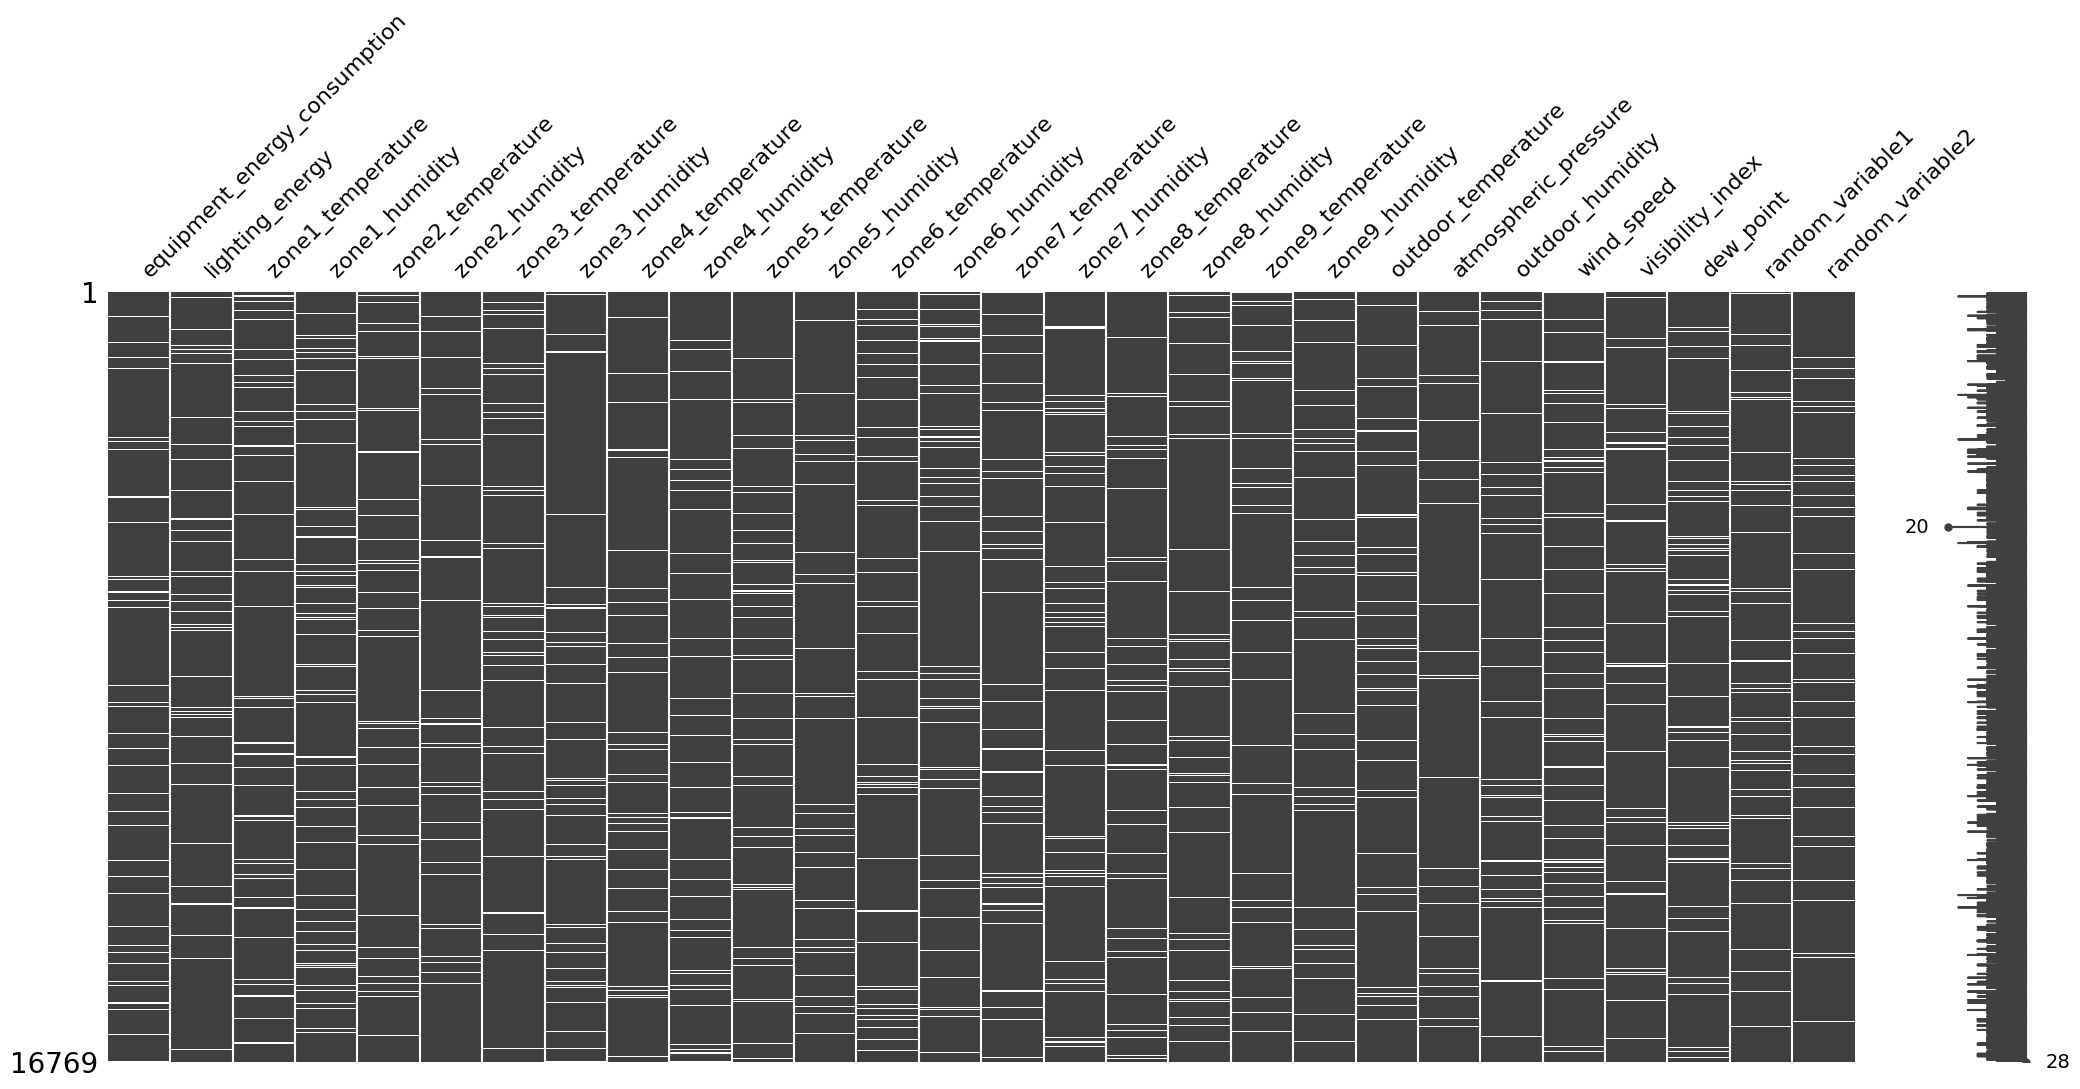

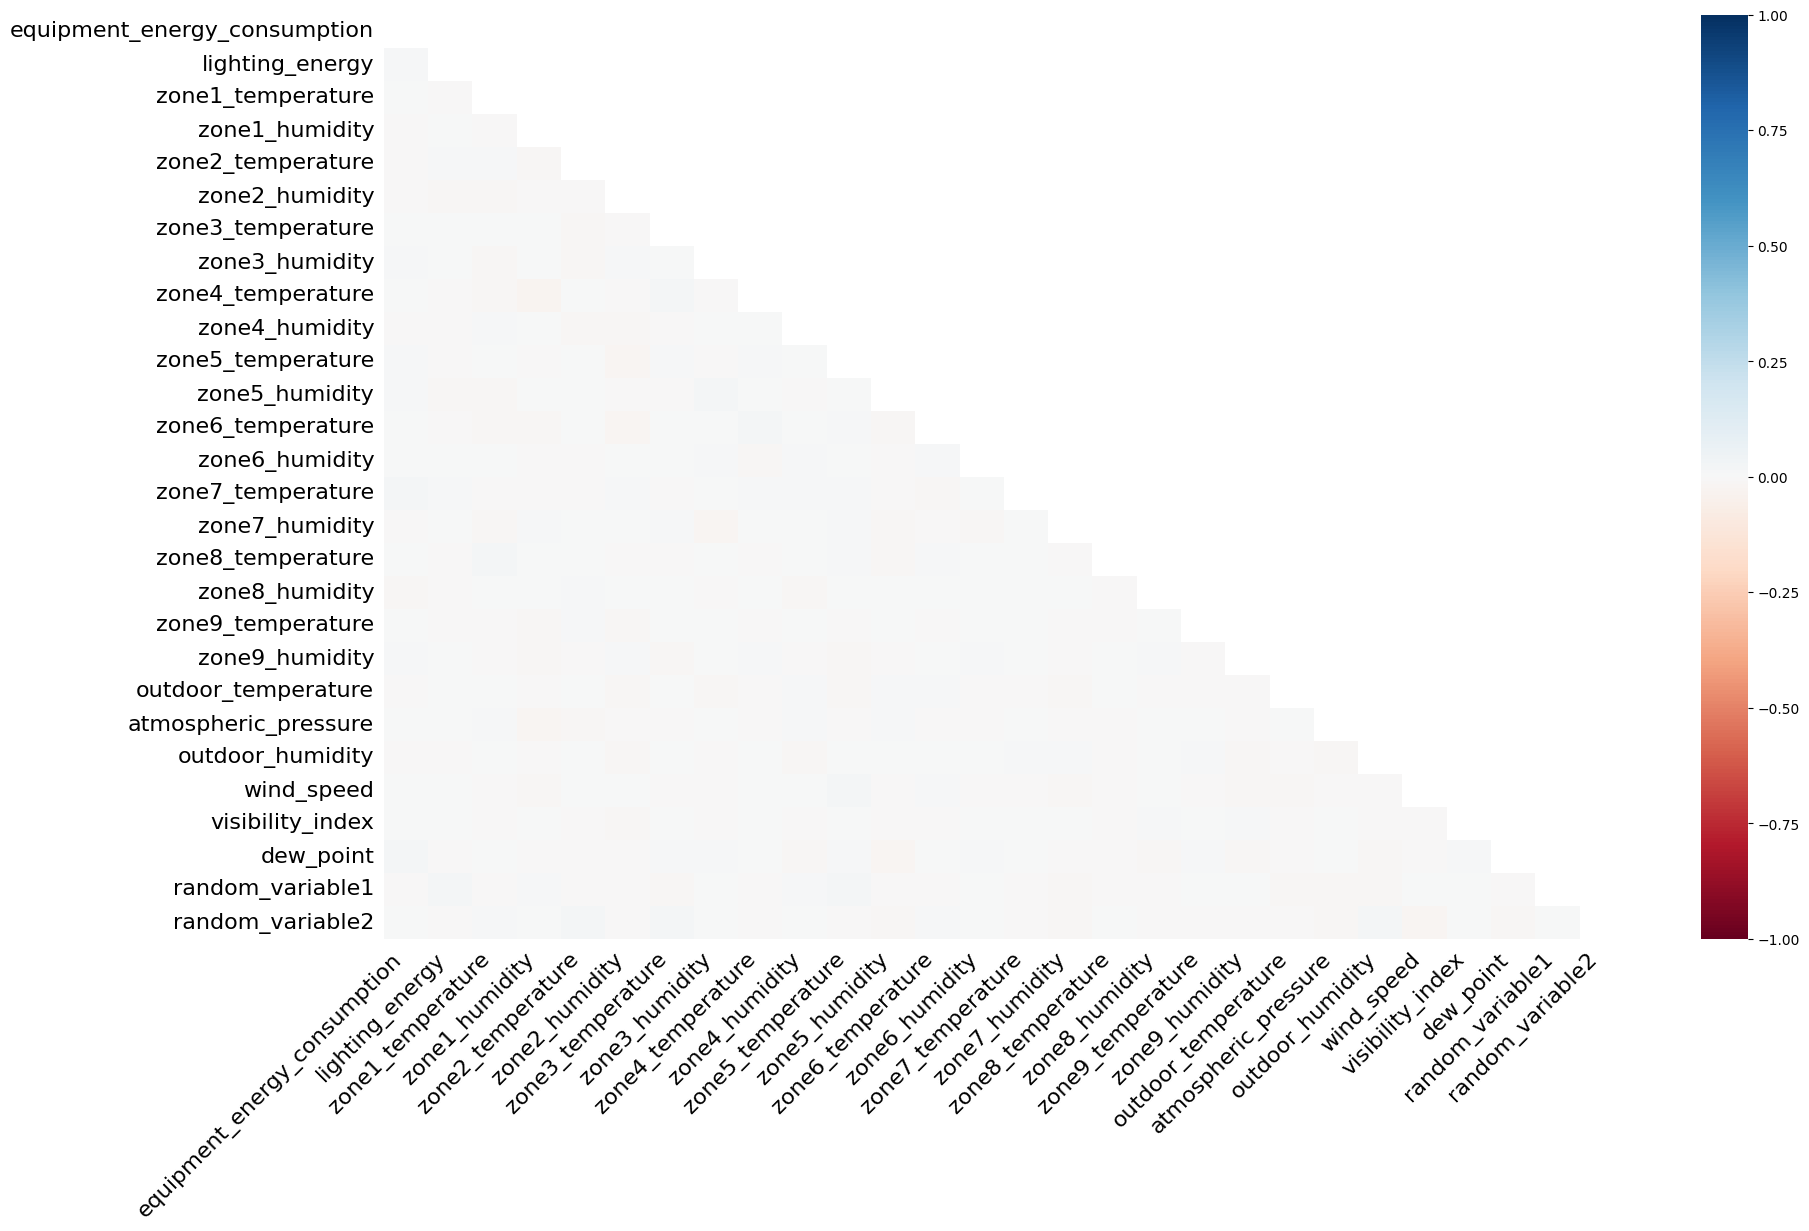

In [28]:
import missingno as msno
msno.matrix(df)
msno.heatmap(df)


There doesn't seem to be any obvious co-occuring of missing values.

Our data is time-series data, so the values will be temporal. So we have to create some time specific features to make sure, we are capturing the patterns. These patterns can help us understand what the true outliers are.

In [29]:
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['dayofweek'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday
df['month'] = df.index.month
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
df['date'] = df.index.date  

In [31]:
df.columns

Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
       'atmospheric_pressure', 'outdoor_humidity', 'wind_speed',
       'visibility_index', 'dew_point', 'random_variable1', 'random_variable2',
       'hour', 'minute', 'dayofweek', 'month', 'is_weekend', 'date'],
      dtype='object')

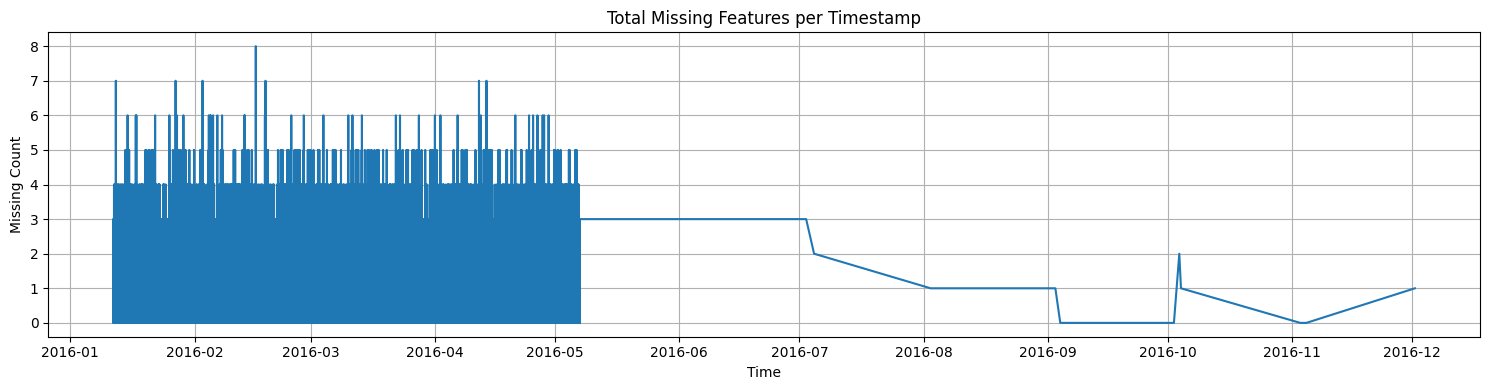

In [32]:
missing_over_time = df.isnull().sum(axis=1)
plt.figure(figsize=(15, 4))
plt.plot(missing_over_time)
plt.title("Total Missing Features per Timestamp")
plt.xlabel("Time")
plt.ylabel("Missing Count")
plt.grid(True)
plt.tight_layout()
plt.show()

This looks weird. Lets check out what the issue is. The issue seems to start after the may month. Lets get the data after May, to see what is going on

In [87]:
issue = df[df.index > '2016-05-01 00:00:00']

In [95]:
# missing_corr = df.isnull().astype(int).corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(missing_corr, cmap='coolwarm', annot=False)
# plt.title("Missingness Correlation Matrix")
# plt.tight_layout()
# plt.show()

In [85]:
issue = df[df.index > '2016-05-07 04:30:00']

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,minute,dayofweek,month,is_weekend,date,missing_count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-02 16:30:00,NaN,10.000000,21.290000,44.256667,20.823333,41.956667,21.500000,NaN,19.000000,NaN,19.000000,54.716667,9.533333,55.233333,19.600000,35.345000,22.050000,48.049444,19.290000,44.530,8.400000,747.050000,65.500000,8.500000,40.000000,2.250000,28.790387,28.790387,16,30,5,7,1,2016-07-02,3
2016-07-04 16:00:00,50.000000,0.000000,NaN,39.626667,21.790000,38.363333,22.650000,38.450000,21.566667,NaN,20.290000,52.530000,12.963333,8.833333,22.290000,32.790000,22.666667,36.966667,20.790000,41.090,10.600000,752.700000,59.000000,6.000000,29.000000,2.900000,23.180637,23.180637,16,0,0,7,0,2016-07-04,2
2016-08-02 18:20:00,480.000000,20.000000,22.926667,43.623333,22.430000,39.933333,24.566667,42.826667,21.100000,42.530000,18.890000,53.000000,7.900000,63.830000,19.362222,35.000000,22.770000,44.608333,18.890000,41.560,7.933333,741.366667,69.666667,NaN,30.666667,2.666667,2.069630,2.069630,18,20,1,8,0,2016-08-02,1
2016-09-02 21:40:00,130.000000,0.000000,22.926667,43.663333,22.323333,40.790000,22.600000,43.530000,19.290000,40.995000,19.445000,50.826667,2.863333,92.300000,20.295556,38.806667,23.408333,42.873889,18.890000,40.860,-37.524768,737.700000,221.668765,7.333333,40.000000,2.233333,49.283244,NaN,21,40,4,9,0,2016-09-02,1
2016-09-04 03:00:00,50.000000,0.000000,21.100000,41.260000,18.390000,45.126667,23.133333,39.900000,20.500000,38.590000,20.290000,47.790000,3.530000,49.460000,21.390000,37.790000,38.626835,43.090000,4.476511,43.000,4.800000,752.300000,91.000000,2.000000,24.000000,3.500000,15.825518,15.825518,3,0,6,9,1,2016-09-04,0
2016-10-02 12:00:00,80.000000,0.000000,20.700000,42.826667,20.000000,40.590000,21.200000,41.230000,19.500000,41.266667,18.890000,49.710000,6.190000,93.190000,19.561111,38.730000,21.801111,45.670556,19.200000,44.595,5.500000,741.800000,88.000000,4.000000,40.000000,3.600000,6.238859,6.238859,12,0,6,10,1,2016-10-02,0
2016-10-03 20:10:00,1139.985693,20.000000,22.100000,38.723333,19.790000,39.566667,21.290000,38.845000,21.390000,35.863333,NaN,47.090000,4.660000,35.656667,19.972500,NaN,22.500000,36.900000,18.100000,40.090,5.816667,761.466667,68.333333,2.000000,64.666667,0.366667,10.707282,10.707282,20,10,0,10,0,2016-10-03,2
2016-10-04 06:10:00,50.000000,86.002966,21.290000,39.626667,18.100000,44.290000,22.390000,38.760000,NaN,37.900000,19.847143,46.352857,1.500000,54.626667,21.600000,37.590000,22.040000,38.236000,20.200000,44.500,3.683333,752.250000,96.666667,1.000000,18.000000,3.150000,49.199695,49.199695,6,10,1,10,0,2016-10-04,1
2016-11-03 00:50:00,50.000000,0.000000,21.390000,37.590000,18.463333,39.966667,21.100000,37.790000,20.600000,33.790000,18.290000,51.590000,1.826667,59.126667,19.633333,34.230000,21.700000,41.360000,18.100000,40.200,1.750000,763.000000,84.166667,1.000000,60.833333,-0.633333,6.905370,6.905370,0,50,3,11,0,2016-11-03,0


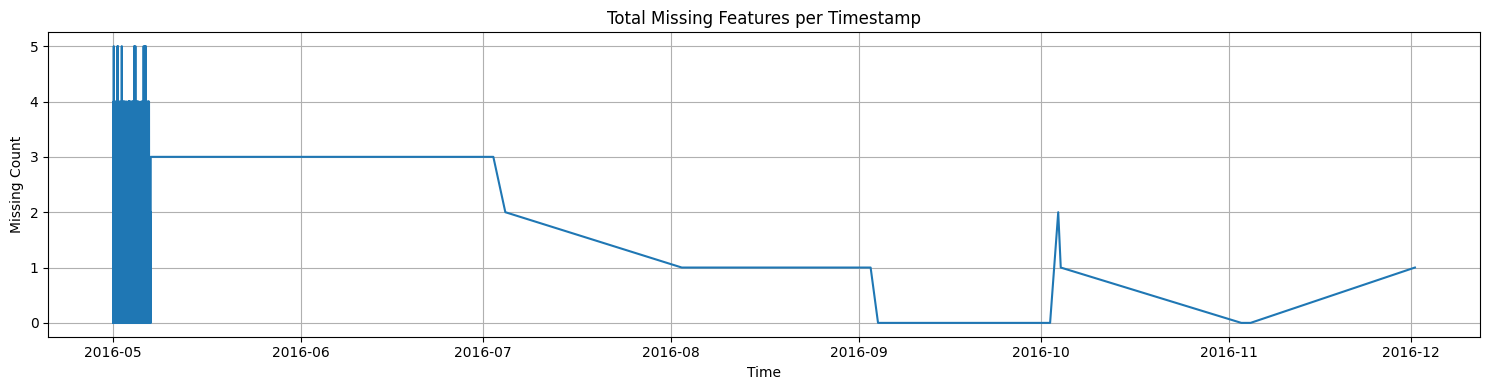

In [90]:
missing_over_time = issue.isnull().sum(axis=1)
plt.figure(figsize=(15, 4))
plt.plot(missing_over_time)
plt.title("Total Missing Features per Timestamp")
plt.xlabel("Time")
plt.ylabel("Missing Count")
plt.grid(True)
plt.tight_layout()
plt.show()

There seems to be lesser values after May. Lets check out

In [92]:
issue.tail(20)

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,minute,dayofweek,month,is_weekend,date,missing_count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-07 03:10:00,70.000000,0.000000,23.890000,37.900000,21.890000,39.090000,24.390000,37.730000,23.700000,36.700000,21.100000,48.700000,10.854000,22.890000,22.890000,34.290000,23.790000,43.560000,21.790000,43.230,14.183333,752.350000,55.000000,2.666667,40.000000,5.183333,39.708106,39.708106,3,10,5,5,1,2016-05-07,0
2016-05-07 03:20:00,50.000000,0.000000,23.823333,37.826667,21.823333,39.030000,24.463333,37.863333,23.600000,36.590000,21.100000,48.626667,10.800000,23.238571,22.890000,34.290000,23.790000,43.500000,21.790000,43.290,13.766667,752.300000,57.000000,2.333333,40.000000,5.266667,9.313416,9.313416,3,20,5,5,1,2016-05-07,0
2016-05-07 03:30:00,60.000000,0.000000,23.823333,37.790000,21.840000,39.145000,24.500000,37.950000,23.633333,NaN,21.100000,48.560000,10.800000,23.400000,22.790000,34.200000,23.790000,43.400000,21.790000,43.290,13.350000,752.250000,59.000000,2.000000,40.000000,5.350000,40.648347,40.648347,3,30,5,5,1,2016-05-07,1
2016-05-07 03:40:00,50.000000,0.000000,23.823333,37.790000,21.760000,39.090000,24.500000,NaN,23.633333,36.626667,21.100000,NaN,10.721429,23.228571,22.790000,34.184286,23.790000,43.326667,21.790000,43.290,12.933333,752.200000,61.000000,1.666667,40.000000,5.433333,32.225730,32.225730,3,40,5,5,1,2016-05-07,2
2016-05-07 03:50:00,50.000000,0.000000,23.790000,37.700000,21.700000,77.265503,24.500000,38.060000,23.600000,36.590000,21.100000,48.400000,10.690000,23.976000,22.790000,34.090000,23.760000,43.200000,21.790000,43.290,12.516667,752.150000,63.000000,1.333333,40.000000,5.516667,42.612096,42.612096,3,50,5,5,1,2016-05-07,0
2016-05-07 04:00:00,50.000000,0.000000,23.790000,37.700000,21.700000,39.090000,24.500000,38.090000,23.600000,36.590000,21.100000,48.326667,10.784286,23.422857,22.790000,34.090000,23.700000,NaN,21.790000,43.290,12.100000,752.100000,65.000000,1.000000,40.000000,5.600000,46.954369,46.954369,4,0,5,5,1,2016-05-07,1
2016-05-07 04:10:00,60.000000,0.000000,23.790000,37.700000,21.700000,77.265503,24.500000,38.090000,23.600000,36.590000,21.100000,48.260000,10.778000,22.996000,22.790000,34.090000,23.700000,43.200000,21.790000,43.290,12.066667,752.066667,64.833333,1.000000,40.000000,5.533333,16.800123,16.800123,4,10,5,5,1,2016-05-07,0
2016-05-07 04:20:00,40.000000,0.000000,23.790000,37.730000,21.633333,39.066667,24.500000,38.126667,23.600000,36.663333,21.100000,48.126667,10.625714,23.440000,22.790000,34.090000,23.700000,43.200000,21.790000,43.290,12.033333,752.033333,NaN,1.000000,40.000000,5.466667,25.197838,25.197838,4,20,5,5,1,2016-05-07,1
2016-05-07 04:30:00,60.000000,0.000000,NaN,NaN,21.633333,NaN,24.500000,38.200000,23.600000,36.626667,21.100000,48.060000,10.636000,23.576000,22.790000,34.036000,23.700000,43.060000,21.790000,43.400,12.000000,752.000000,64.500000,1.000000,40.000000,5.400000,41.848600,41.848600,4,30,5,5,1,2016-05-07,3


As we can see, there are very little dates after the 7th of May. The dates after that could be wrong values, as they are very less in number, we can just remove them.

In [93]:
df = df[df.index < '2016-07-02']

In [137]:
df.columns

Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
       'atmospheric_pressure', 'outdoor_humidity', 'wind_speed',
       'visibility_index', 'dew_point', 'random_variable1', 'random_variable2',
       'hour', 'minute', 'dayofweek', 'month', 'is_weekend', 'date',
       'missing_count'],
      dtype='object')

In [94]:
sensor_features = [
    'equipment_energy_consumption', 'lighting_energy',
    'zone1_temperature', 'zone1_humidity','zone2_temperature', 'zone2_humidity',  
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',  
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',  
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',  
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',  
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',  
       'atmospheric_pressure','visibility_index', 'random_variable1', 'random_variable2', 
       'outdoor_humidity', 'wind_speed', 'dew_point'] 



,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,minute,dayofweek,month,is_weekend,date,missing_count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-07 03:50:00,50.0,0.0,23.79,37.70,21.700000,77.265503,24.5,38.060000,23.6,36.590000,21.1,48.400000,10.690000,23.976000,22.79,34.090,23.76,43.20,21.79,43.29,12.516667,752.150000,63.000000,1.333333,40.0,5.516667,42.612096,42.612096,3,50,5,5,1,2016-05-07,0
2016-05-07 04:00:00,50.0,0.0,23.79,37.70,21.700000,39.090000,24.5,38.090000,23.6,36.590000,21.1,48.326667,10.784286,23.422857,22.79,34.090,23.70,NaN,21.79,43.29,12.100000,752.100000,65.000000,1.000000,40.0,5.600000,46.954369,46.954369,4,0,5,5,1,2016-05-07,1
2016-05-07 04:10:00,60.0,0.0,23.79,37.70,21.700000,77.265503,24.5,38.090000,23.6,36.590000,21.1,48.260000,10.778000,22.996000,22.79,34.090,23.70,43.20,21.79,43.29,12.066667,752.066667,64.833333,1.000000,40.0,5.533333,16.800123,16.800123,4,10,5,5,1,2016-05-07,0
2016-05-07 04:20:00,40.0,0.0,23.79,37.73,21.633333,39.066667,24.5,38.126667,23.6,36.663333,21.1,48.126667,10.625714,23.440000,22.79,34.090,23.70,43.20,21.79,43.29,12.033333,752.033333,NaN,1.000000,40.0,5.466667,25.197838,25.197838,4,20,5,5,1,2016-05-07,1
2016-05-07 04:30:00,60.0,0.0,NaN,NaN,21.633333,NaN,24.5,38.200000,23.6,36.626667,21.1,48.060000,10.636000,23.576000,22.79,34.036,23.70,43.06,21.79,43.40,12.000000,752.000000,64.500000,1.000000,40.0,5.400000,41.848600,41.848600,4,30,5,5,1,2016-05-07,3


(16758, 35)

In [152]:
df.isnull().sum()

equipment_energy_consumption    908
lighting_energy                 861
zone1_temperature               942
zone1_humidity                  886
zone2_temperature               917
zone2_humidity                  862
zone3_temperature               797
zone3_humidity                  875
zone4_temperature               808
zone4_humidity                  773
zone5_temperature               828
zone5_humidity                  797
zone6_temperature               841
zone6_humidity                  841
zone7_temperature               787
zone7_humidity                  799
zone8_temperature               841
zone8_humidity                  775
zone9_temperature               770
zone9_humidity                  883
outdoor_temperature             801
atmospheric_pressure            841
outdoor_humidity                792
wind_speed                      818
visibility_index                808
dew_point                       823
random_variable1                822
random_variable2            

In [181]:
df_imputed = df.copy()


In [182]:
for col in sensor_features:
    df_imputed[col] = df_imputed[col].interpolate(method = 'time')
    if df_imputed[col].isnull().sum() > 0:
        df_imputed[col] = df_imputed[col].fillna(method ='ffill')
        if df_imputed[col].isnull().sum() > 0:
            df_imputed[col] = df_imputed[col].fillna(method ='bfill')




C:\Users\Ranjit\AppData\Local\Temp\ipykernel_12052\2150805367.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed[col] = df_imputed[col].fillna(method ='ffill')
C:\Users\Ranjit\AppData\Local\Temp\ipykernel_12052\2150805367.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed[col] = df_imputed[col].fillna(method ='bfill')
C:\Users\Ranjit\AppData\Local\Temp\ipykernel_12052\2150805367.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed[col] = df_imputed[col].fillna(method ='ffill')
C:\Users\Ranjit\AppData\Local\Temp\ipykernel_12052\2150805367.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed[col

In [117]:
import matplotlib.dates as mdates

def plot_hourly_progression(df, column_name, start_date_str, end_date_str):
    """
    Plots the hourly progression of a specified column in a DataFrame over a given date range.

    Args:
        df (pd.DataFrame): DataFrame with a DatetimeIndex.
        column_name (str): The name of the column to plot.
        start_date_str (str): The start date of the period to plot (e.g., 'YYYY-MM-DD').
        end_date_str (str): The end date of the period to plot (e.g., 'YYYY-MM-DD').
    """
    # Ensure the DataFrame index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        try:
            # Attempt to convert index if it's not already a DatetimeIndex
            # This assumes your index column is suitable for datetime conversion
            df.index = pd.to_datetime(df.index)
            print("Converted DataFrame index to DatetimeIndex.")
        except Exception as e:
            print(f"Error: DataFrame index is not a DatetimeIndex and could not be converted: {e}")
            print("Please ensure your DataFrame's index is a DatetimeIndex (e.g., by using df.set_index('timestamp_column', inplace=True) and pd.to_datetime(df.index)).")
            return

    # Ensure column_name is valid
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return

    # Parse date strings to datetime objects for filtering
    # .normalize() sets the time to midnight for consistent day-based filtering
    try:
        start_dt = pd.to_datetime(start_date_str).normalize()
        # Filter up to the very end of the end_date_str
        end_dt = pd.to_datetime(end_date_str).normalize() + pd.Timedelta(days=1) - pd.Timedelta(microseconds=1)
    except ValueError as e:
        print(f"Error parsing date strings: {e}. Please use 'YYYY-MM-DD' format.")
        return
    
    # Filter the DataFrame for the specified date range and column
    filtered_df = df.loc[(df.index >= start_dt) & (df.index <= end_dt), [column_name]]

    if filtered_df.empty:
        print(f"No data found for column '{column_name}' in the date range {start_date_str} to {end_date_str}.")
        return

    # Determine the actual start and end dates from the input strings for the title
    title_start_date = pd.to_datetime(start_date_str).strftime('%Y-%m-%d')
    title_end_date = pd.to_datetime(end_date_str).strftime('%Y-%m-%d')

    # Plotting
    plt.figure(figsize=(17, 6))
    plt.plot(filtered_df.index, filtered_df[column_name], marker='.', linestyle='-', markersize=4, label=column_name)
    
    plt.title(f'Hourly Progression of {column_name}\nFrom {title_start_date} to {title_end_date}')
    plt.ylabel(column_name)
    
    # X-axis formatting based on the length of the date range
    num_days_in_range = (pd.to_datetime(end_date_str).normalize() - pd.to_datetime(start_date_str).normalize()).days + 1

    if num_days_in_range == 1:
        plt.xlabel('Hour of the Day')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        # AutoDateLocator tries to pick sensible tick locations
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12)) 
    else: # Multiple days
        plt.xlabel('Time')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M')) # e.g., Jan 01, 14:30
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))

    plt.xticks(rotation=30, ha='right') # Rotate ticks for better readability
    plt.grid(True, which='major', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
    plt.show()


In [158]:
def compare_imputation(df_original, df_imputed, column_name):
    """
    Compares a column's statistics and distribution before and after imputation.

    Args:
        df_original (pd.DataFrame): The DataFrame with original data (may contain NaNs).
        df_imputed (pd.DataFrame): The DataFrame with imputed data.
        column_name (str): The name of the column to compare.
    """
    print(f"--- Descriptive Statistics for '{column_name}' ---")
    print("\nOriginal Data:")
    print(df_original[column_name].describe())
    print("\nImputed Data:")
    print(df_imputed[column_name].describe())
    print("-" * 50)

    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[column_name].dropna(), color="blue", label='Original', kde=False, stat="density", common_norm=False)
    sns.histplot(df_imputed[column_name], color="orange", label='Imputed', kde=False, stat="density", common_norm=False)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()

    # Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_original[column_name].dropna(), color="blue", label='Original', fill=True, alpha=0.5)
    sns.kdeplot(df_imputed[column_name], color="orange", label='Imputed', fill=True, alpha=0.5)
    plt.title(f'Density Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()


# compare_imputation(df, df_imputed, 'zone1_temperature')

# You can loop through your sensor features if you want to check several:
#  # Optional

--- Descriptive Statistics for 'equipment_energy_consumption' ---

Original Data:
count    15850.000000
mean       116.862696
std        169.188379
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1139.985693
Name: equipment_energy_consumption, dtype: float64

Imputed Data:
count    16758.000000
mean       117.071191
std        167.698180
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1139.985693
Name: equipment_energy_consumption, dtype: float64
--------------------------------------------------


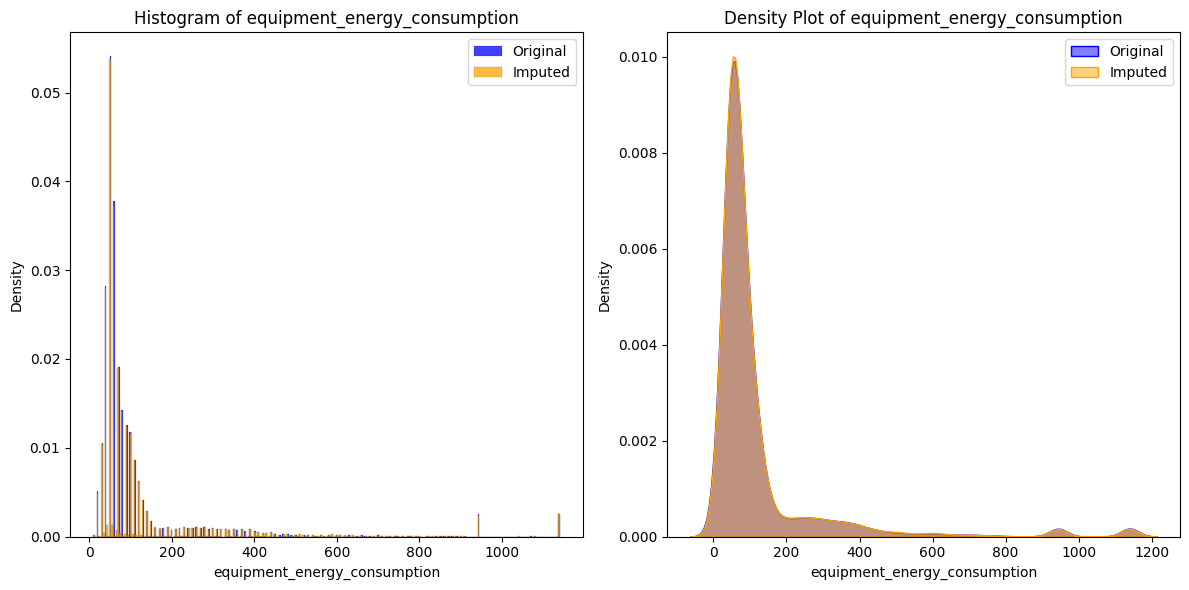

--- Descriptive Statistics for 'lighting_energy' ---

Original Data:
count    15897.000000
mean         5.799770
std         13.958090
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max         86.002966
Name: lighting_energy, dtype: float64

Imputed Data:
count    16758.000000
mean         5.815137
std         13.835331
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max         86.002966
Name: lighting_energy, dtype: float64
--------------------------------------------------


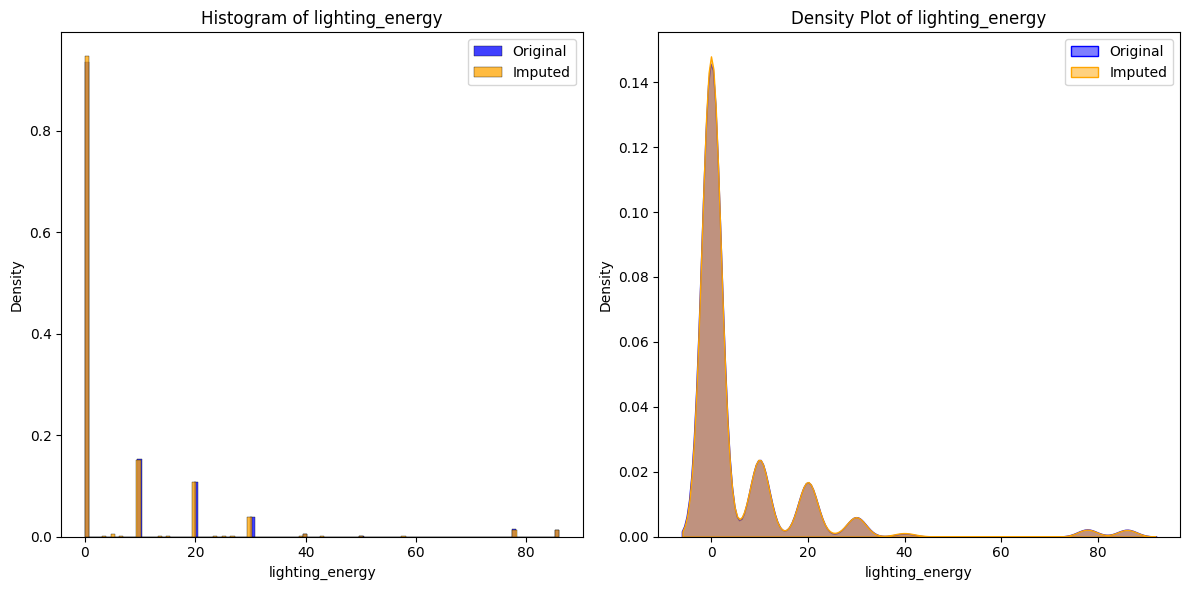

--- Descriptive Statistics for 'zone1_temperature' ---

Original Data:
count    15816.000000
mean        21.248675
std          2.162941
min          8.726818
25%         20.500000
50%         21.323333
75%         22.100000
max         33.746609
Name: zone1_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        21.246628
std          2.138783
min          8.726818
25%         20.500000
50%         21.323333
75%         22.100000
max         33.746609
Name: zone1_temperature, dtype: float64
--------------------------------------------------


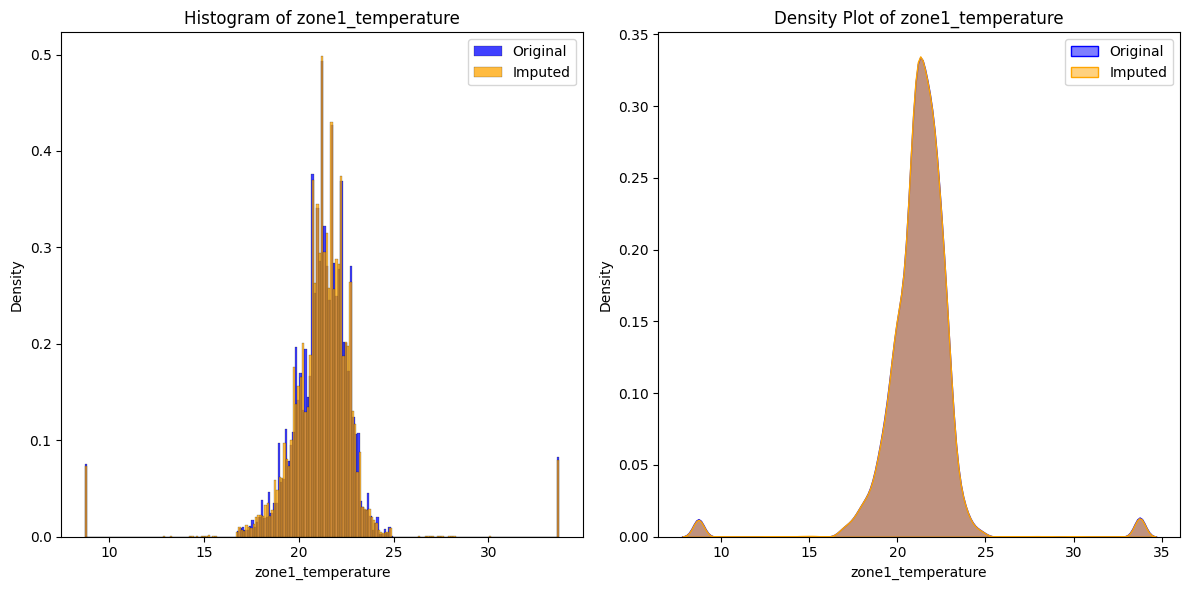

--- Descriptive Statistics for 'zone1_humidity' ---

Original Data:
count    15872.000000
mean        39.802730
std          6.304641
min          3.348060
25%         37.090000
50%         39.290000
75%         42.530000
max         76.292756
Name: zone1_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        39.798367
std          6.272373
min          3.348060
25%         37.090000
50%         39.290000
75%         42.530000
max         76.292756
Name: zone1_humidity, dtype: float64
--------------------------------------------------


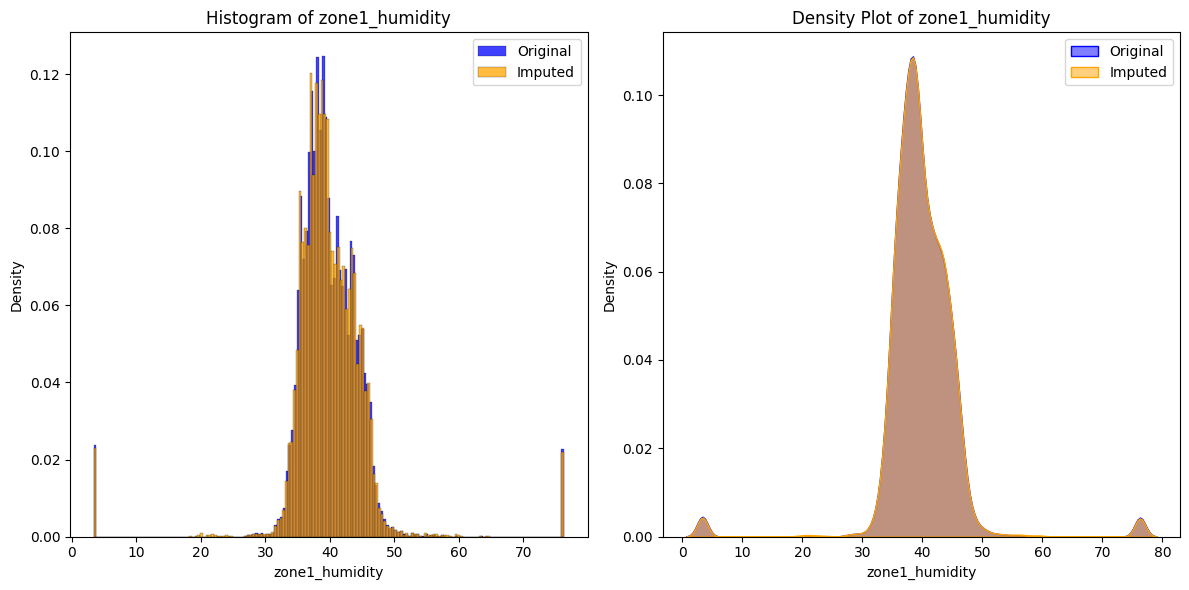

--- Descriptive Statistics for 'zone2_temperature' ---

Original Data:
count    15841.000000
mean        19.791506
std          2.937125
min          2.988199
25%         18.600000
50%         19.600000
75%         20.790000
max         36.552882
Name: zone2_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        19.790419
std          2.915487
min          2.988199
25%         18.600000
50%         19.600000
75%         20.790000
max         36.552882
Name: zone2_temperature, dtype: float64
--------------------------------------------------


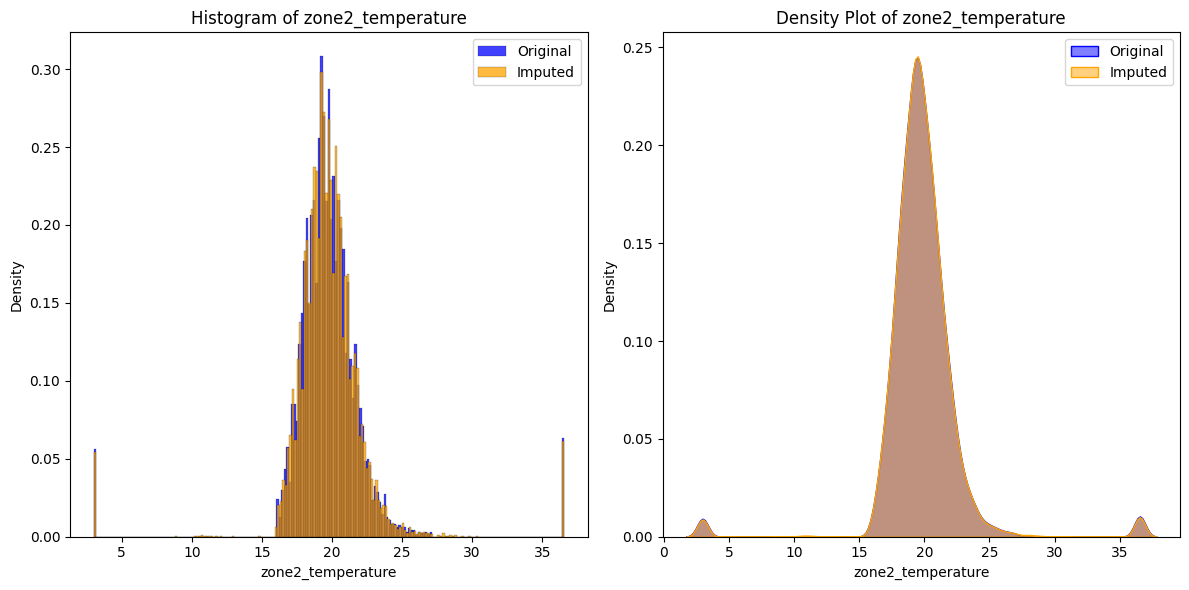

--- Descriptive Statistics for 'zone2_humidity' ---

Original Data:
count    15896.000000
mean        40.213642
std          6.720570
min          3.193842
25%         37.845000
50%         40.360000
75%         43.005625
max         77.265503
Name: zone2_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        40.223010
std          6.645446
min          3.193842
25%         37.863333
50%         40.363333
75%         43.030000
max         77.265503
Name: zone2_humidity, dtype: float64
--------------------------------------------------


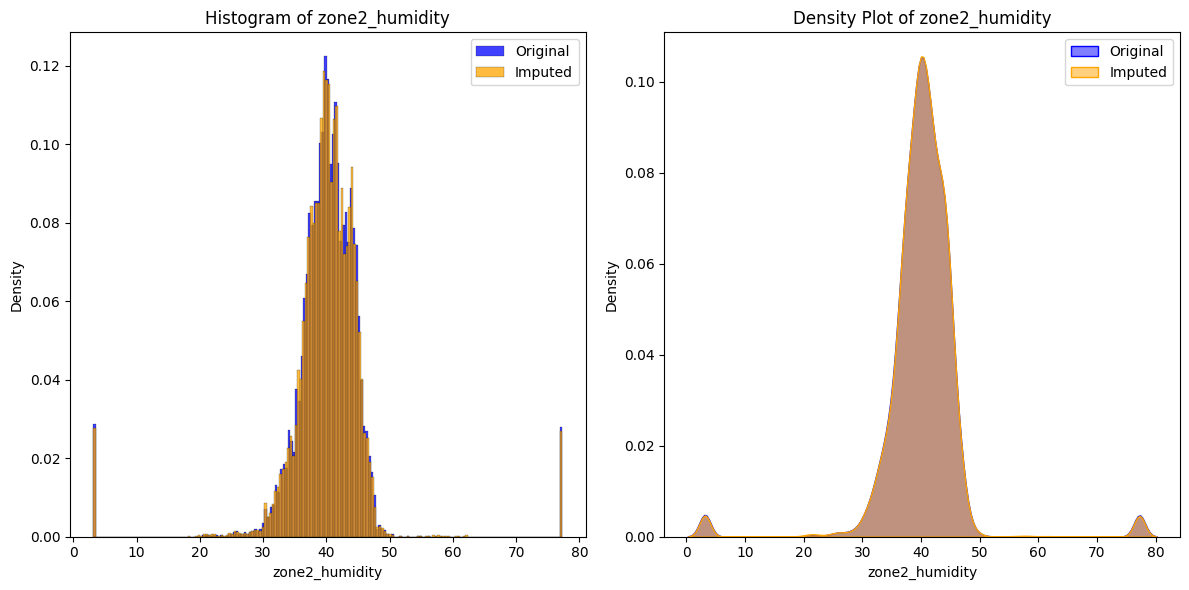

--- Descriptive Statistics for 'zone3_temperature' ---

Original Data:
count    15961.000000
mean        21.666479
std          2.594240
min          6.543921
25%         20.533333
50%         21.763333
75%         22.760000
max         36.823982
Name: zone3_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        21.666478
std          2.577343
min          6.543921
25%         20.528929
50%         21.763333
75%         22.760000
max         36.823982
Name: zone3_temperature, dtype: float64
--------------------------------------------------


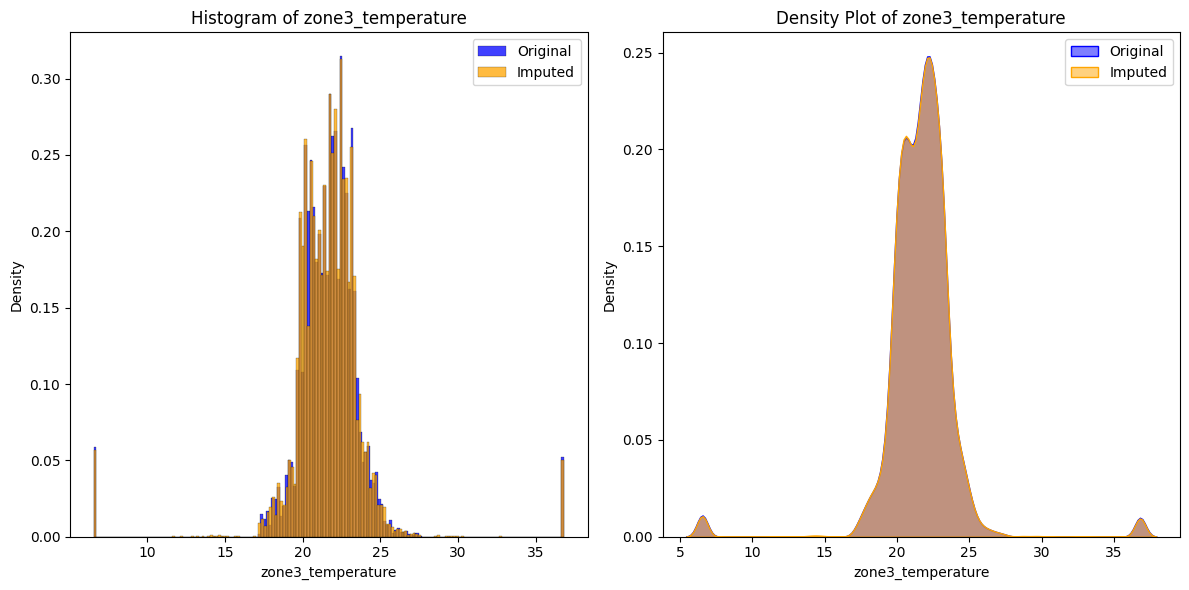

--- Descriptive Statistics for 'zone3_humidity' ---

Original Data:
count    15883.000000
mean        39.138931
std          5.499071
min          6.902515
25%         36.700000
50%         38.400000
75%         41.560000
max         71.406273
Name: zone3_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        39.127299
std          5.439218
min          6.902515
25%         36.700000
50%         38.400000
75%         41.500000
max         71.406273
Name: zone3_humidity, dtype: float64
--------------------------------------------------


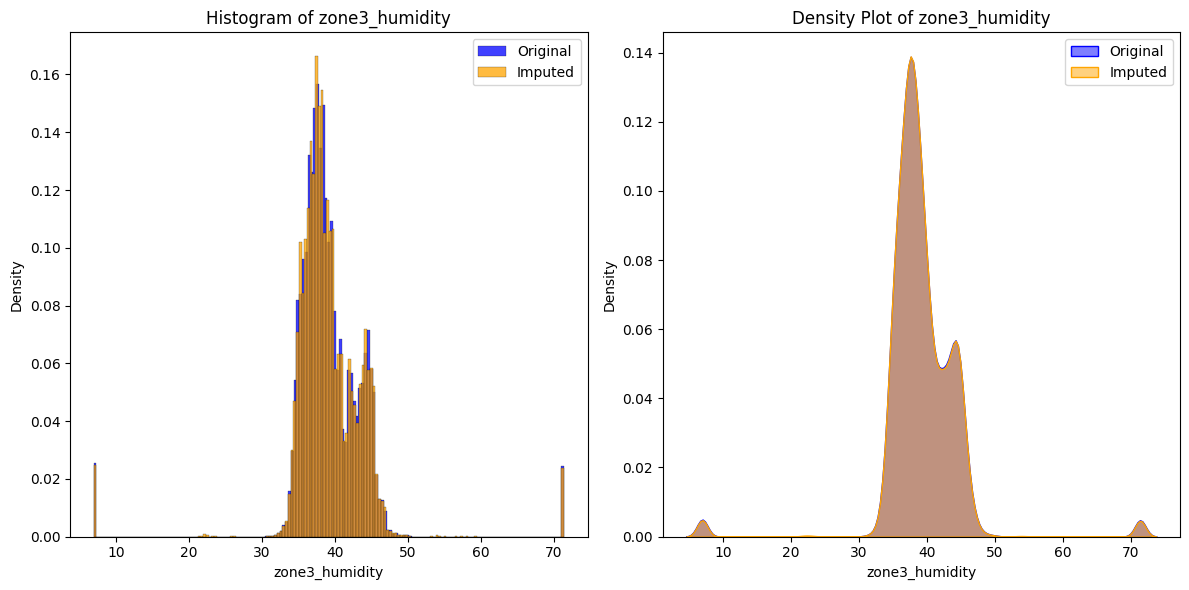

--- Descriptive Statistics for 'zone4_temperature' ---

Original Data:
count    15950.000000
mean        20.239680
std          2.780528
min          4.613485
25%         19.260000
50%         20.290000
75%         21.356667
max         35.921144
Name: zone4_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        20.237215
std          2.757513
min          4.613485
25%         19.260000
50%         20.290000
75%         21.356667
max         35.921144
Name: zone4_temperature, dtype: float64
--------------------------------------------------


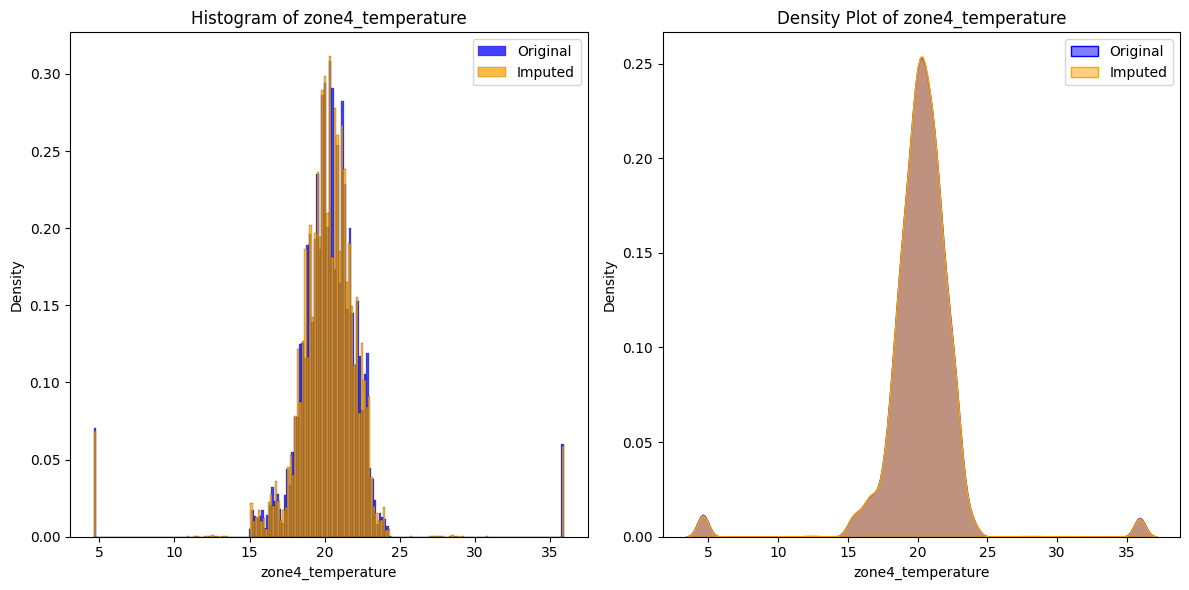

--- Descriptive Statistics for 'zone4_humidity' ---

Original Data:
count    15985.000000
mean        38.770269
std          7.276497
min          4.039613
25%         35.200000
50%         38.121429
75%         41.626667
max         81.446225
Name: zone4_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        38.764781
std          7.235520
min          4.039613
25%         35.200000
50%         38.090000
75%         41.656500
max         81.446225
Name: zone4_humidity, dtype: float64
--------------------------------------------------


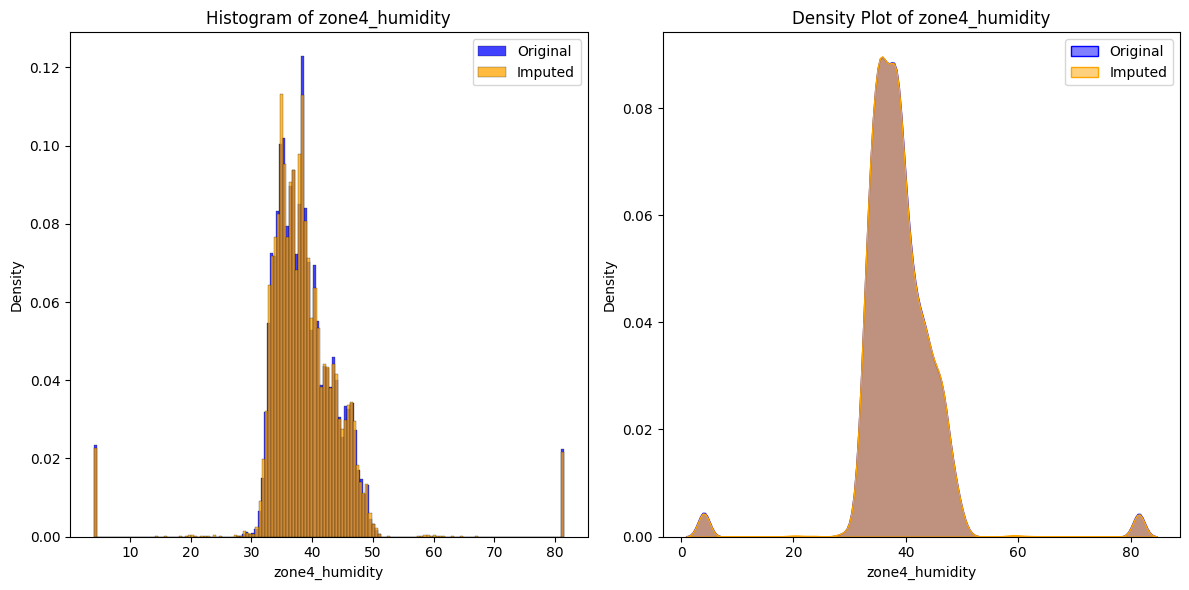

--- Descriptive Statistics for 'zone5_temperature' ---

Original Data:
count    15930.000000
mean        19.052350
std          2.348573
min          5.921094
25%         18.060278
50%         19.050000
75%         20.100000
max         32.157594
Name: zone5_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        19.053935
std          2.332458
min          5.921094
25%         18.057143
50%         19.061111
75%         20.100000
max         32.157594
Name: zone5_temperature, dtype: float64
--------------------------------------------------


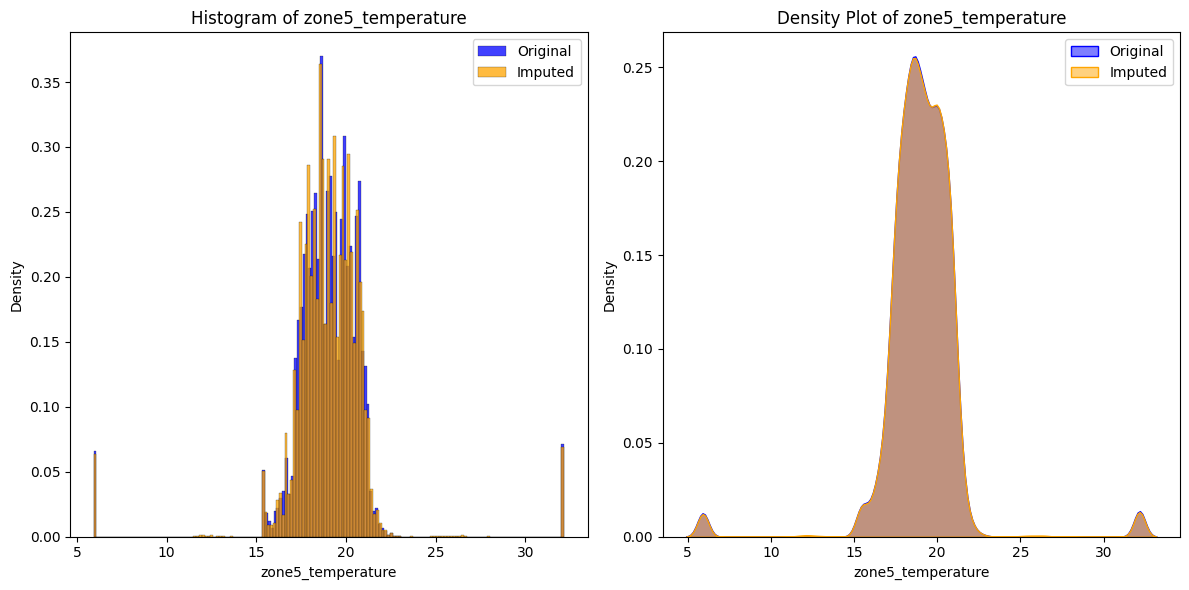

--- Descriptive Statistics for 'zone5_humidity' ---

Original Data:
count    15961.000000
mean        52.011890
std         13.177021
min         35.363333
25%         45.400000
50%         48.900000
75%         53.982222
max        141.640143
Name: zone5_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        52.013149
std         13.095906
min         35.363333
25%         45.400000
50%         48.900000
75%         53.981667
max        141.640143
Name: zone5_humidity, dtype: float64
--------------------------------------------------


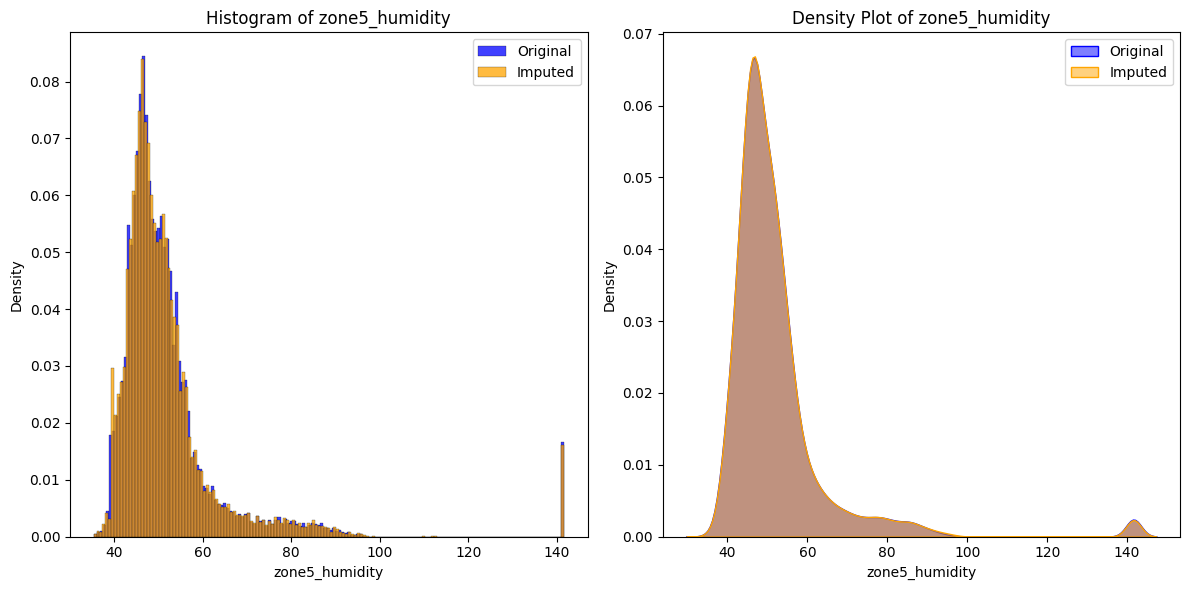

--- Descriptive Statistics for 'zone6_temperature' ---

Original Data:
count    15917.000000
mean         6.470816
std          8.874960
min        -42.987365
25%          2.933333
50%          6.263333
75%          9.690000
max         55.932271
Name: zone6_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean         6.468742
std          8.787710
min        -42.987365
25%          2.930000
50%          6.263333
75%          9.726667
max         55.932271
Name: zone6_temperature, dtype: float64
--------------------------------------------------


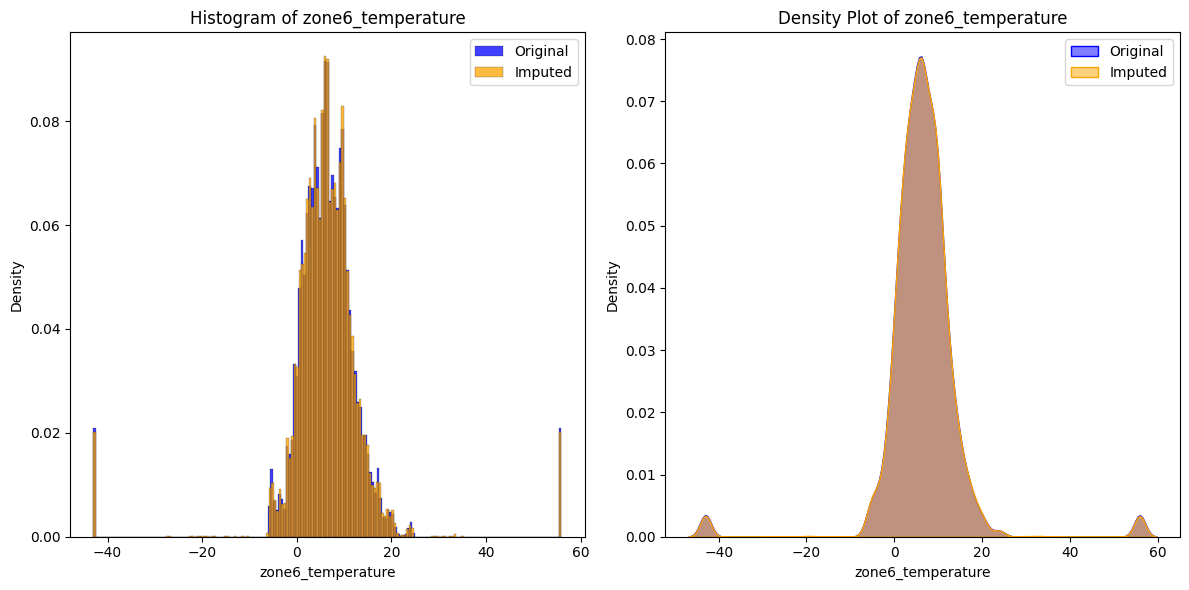

--- Descriptive Statistics for 'zone6_humidity' ---

Original Data:
count    15917.000000
mean        65.082758
std         45.093073
min          1.000000
25%         39.472500
50%         64.690000
75%         87.600000
max        353.393026
Name: zone6_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        65.091112
std         44.848366
min          1.000000
25%         39.459167
50%         64.664048
75%         87.690000
max        353.393026
Name: zone6_humidity, dtype: float64
--------------------------------------------------


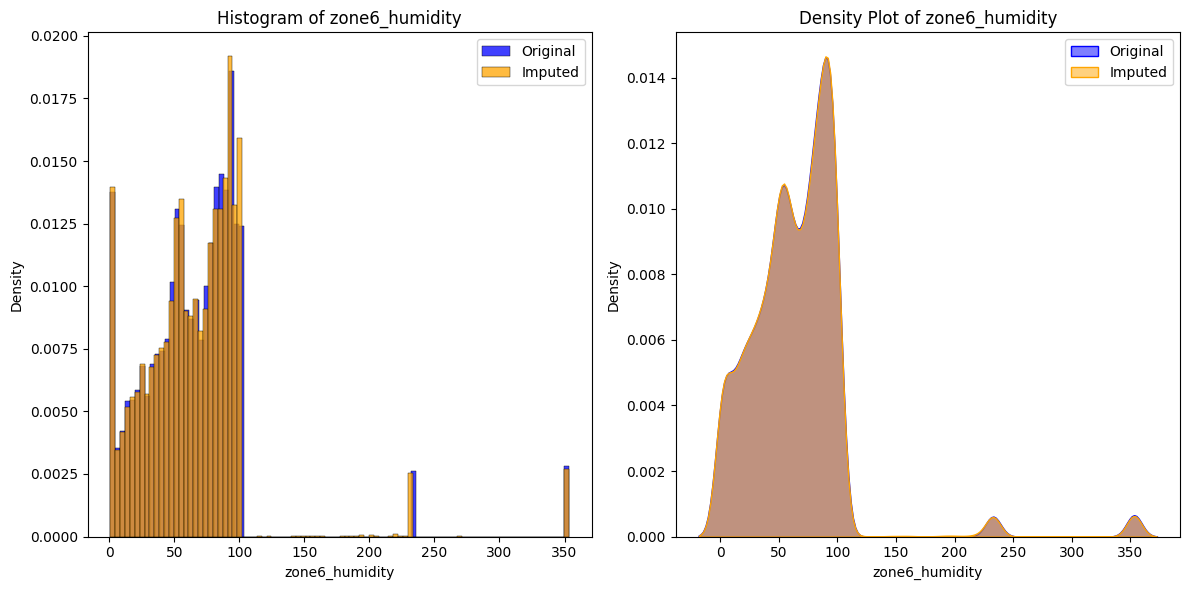

--- Descriptive Statistics for 'zone7_temperature' ---

Original Data:
count    15971.000000
mean        19.671262
std          2.885416
min          3.578021
25%         18.500000
50%         19.600000
75%         21.000000
max         35.712952
Name: zone7_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        19.668840
std          2.863812
min          3.578021
25%         18.500000
50%         19.600000
75%         21.000000
max         35.712952
Name: zone7_temperature, dtype: float64
--------------------------------------------------


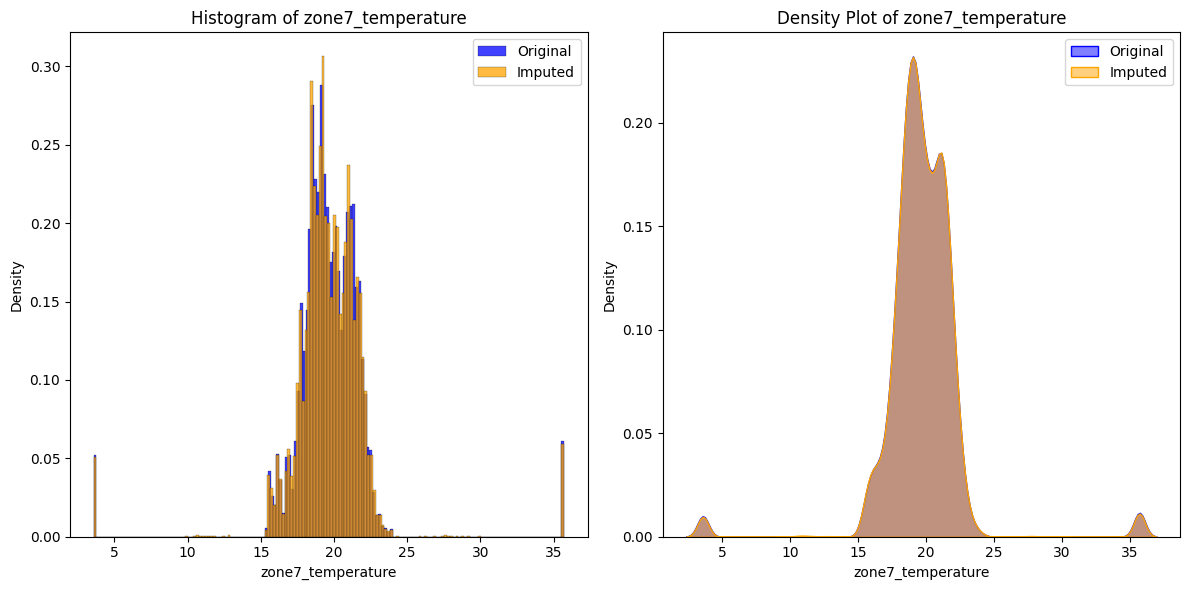

--- Descriptive Statistics for 'zone7_humidity' ---

Original Data:
count    15959.000000
mean        35.152527
std          7.189587
min         15.107645
25%         31.100000
50%         34.290000
75%         38.200833
max         84.882898
Name: zone7_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        35.136499
std          7.145459
min         15.107645
25%         31.100000
50%         34.290000
75%         38.200000
max         84.882898
Name: zone7_humidity, dtype: float64
--------------------------------------------------


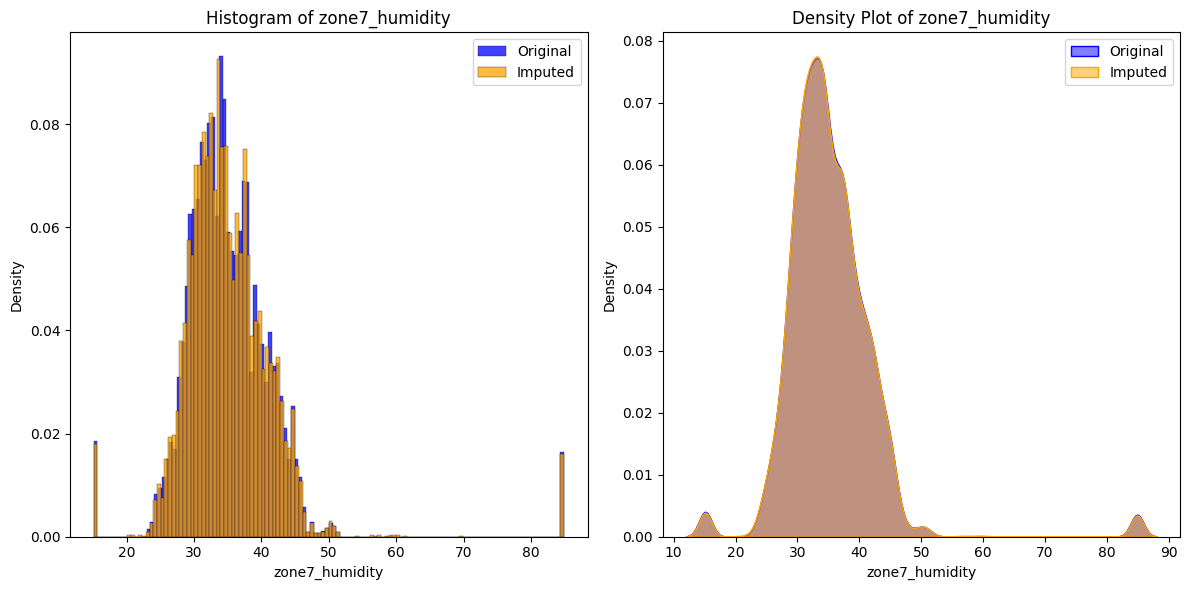

--- Descriptive Statistics for 'zone8_temperature' ---

Original Data:
count    15917.000000
mean        21.605660
std          2.974814
min          4.502372
25%         20.500000
50%         21.790000
75%         22.790000
max         38.626835
Name: zone8_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        21.605770
std          2.939920
min          4.502372
25%         20.500000
50%         21.790000
75%         22.802103
max         38.626835
Name: zone8_temperature, dtype: float64
--------------------------------------------------


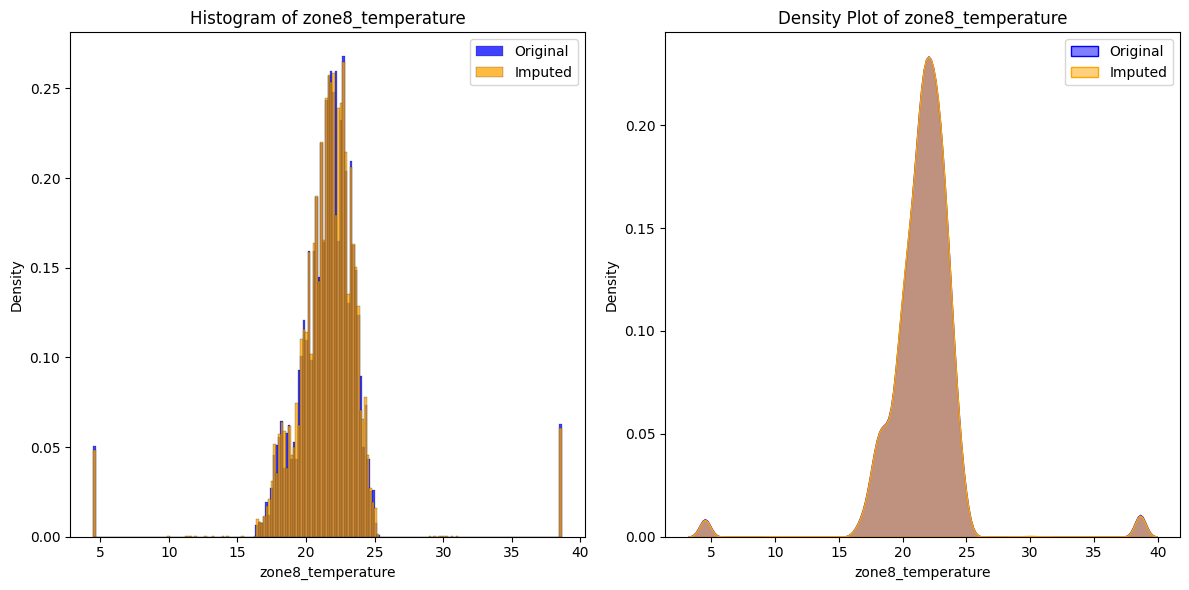

--- Descriptive Statistics for 'zone8_humidity' ---

Original Data:
count    15983.000000
mean        42.853417
std          8.175649
min          9.059527
25%         38.730000
50%         42.090000
75%         46.071389
max         94.385668
Name: zone8_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        42.849908
std          8.120056
min          9.059527
25%         38.729375
50%         42.090000
75%         46.066667
max         94.385668
Name: zone8_humidity, dtype: float64
--------------------------------------------------


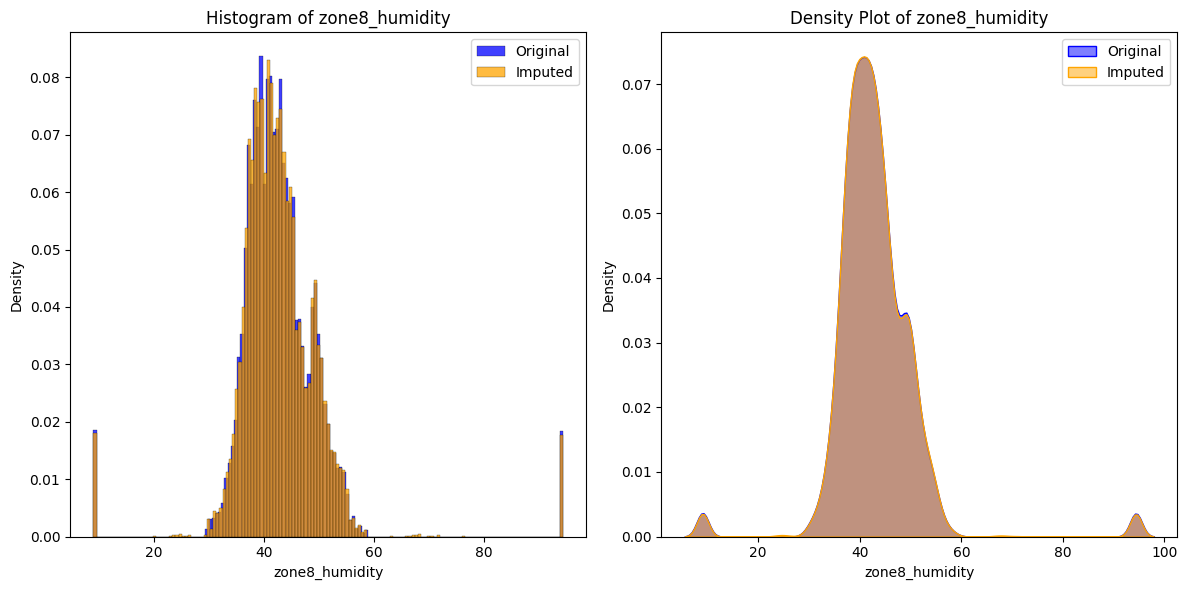

--- Descriptive Statistics for 'zone9_temperature' ---

Original Data:
count    15988.000000
mean        18.850726
std          2.531530
min          4.476511
25%         17.890000
50%         18.890000
75%         20.200000
max         33.238012
Name: zone9_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean        18.849258
std          2.508699
min          4.476511
25%         17.890000
50%         18.890000
75%         20.200000
max         33.238012
Name: zone9_temperature, dtype: float64
--------------------------------------------------


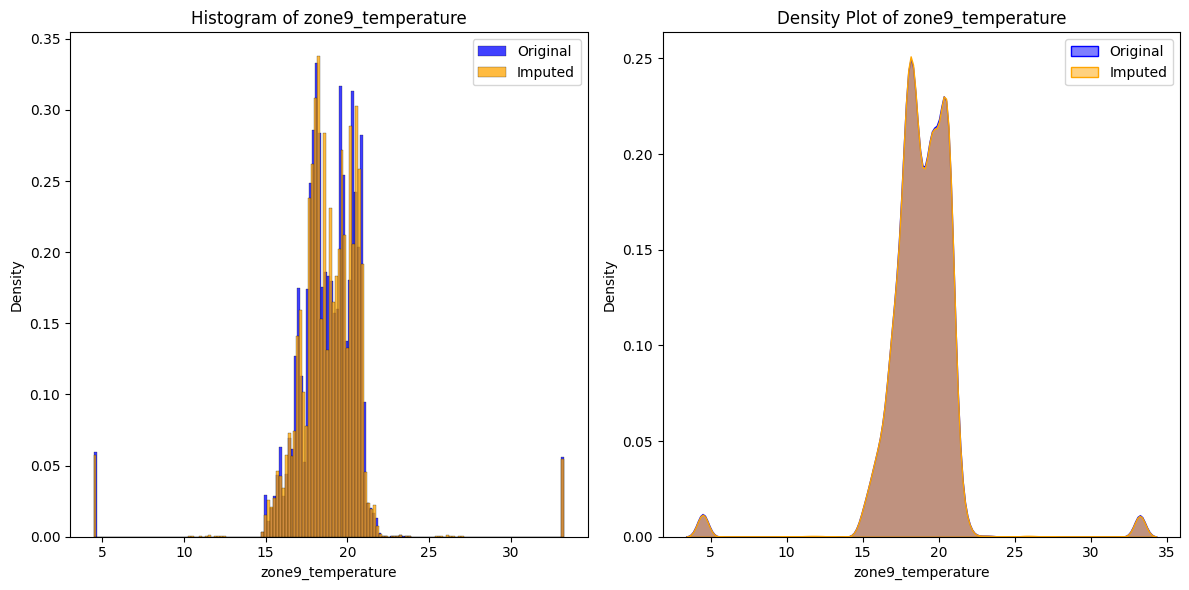

--- Descriptive Statistics for 'zone9_humidity' ---

Original Data:
count    15875.000000
mean        41.240794
std          7.054657
min          0.918228
25%         38.290000
50%         40.433333
75%         43.826667
max         81.582494
Name: zone9_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        41.236764
std          6.976233
min          0.918228
25%         38.290000
50%         40.463333
75%         43.790000
max         81.582494
Name: zone9_humidity, dtype: float64
--------------------------------------------------


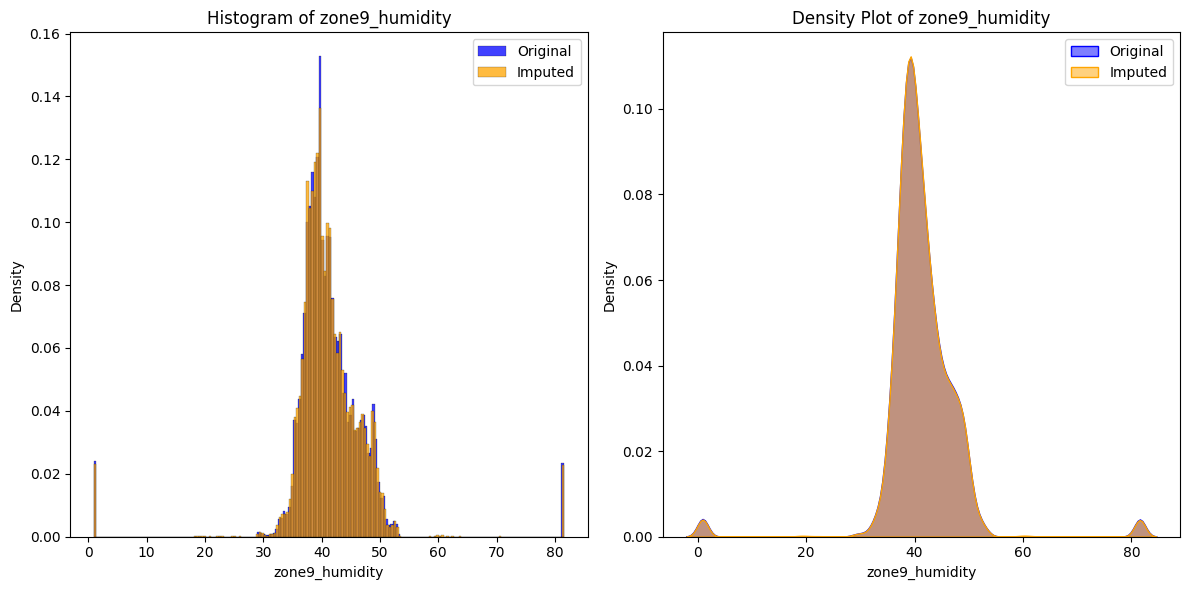

--- Descriptive Statistics for 'outdoor_temperature' ---

Original Data:
count    15957.000000
mean         6.219788
std          7.560081
min        -37.524768
25%          3.000000
50%          6.000000
75%          9.250000
max         49.853906
Name: outdoor_temperature, dtype: float64

Imputed Data:
count    16758.000000
mean         6.214188
std          7.486497
min        -37.524768
25%          3.000000
50%          6.000000
75%          9.250000
max         49.853906
Name: outdoor_temperature, dtype: float64
--------------------------------------------------


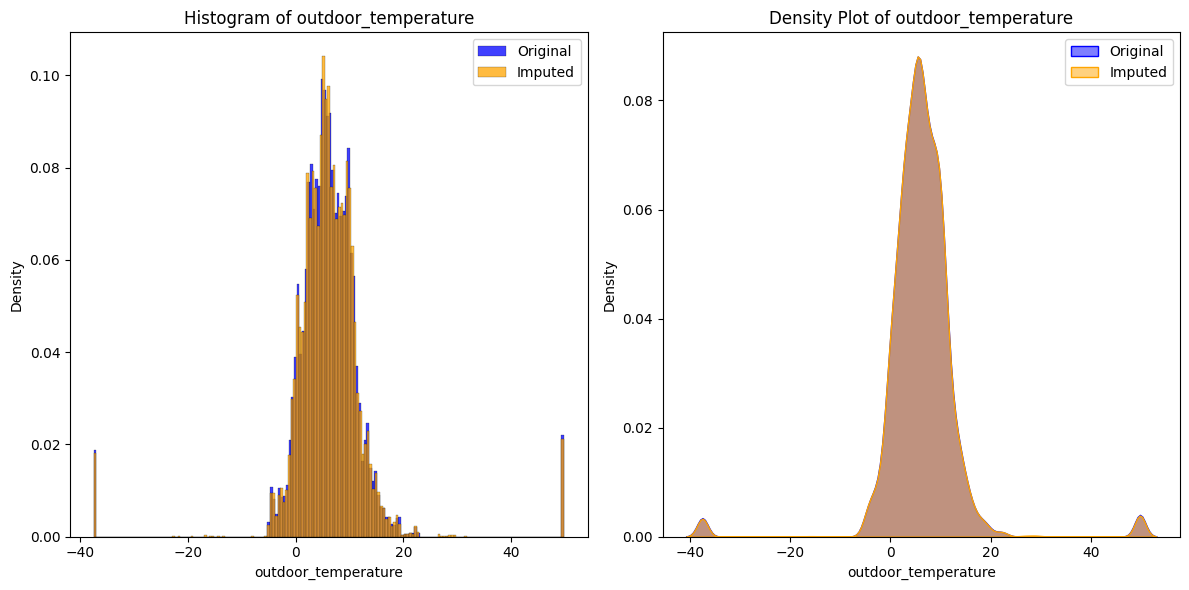

--- Descriptive Statistics for 'atmospheric_pressure' ---

Original Data:
count    15917.000000
mean       755.765597
std         13.671519
min        678.159940
25%        750.800000
50%        756.216667
75%        762.100000
max        833.392675
Name: atmospheric_pressure, dtype: float64

Imputed Data:
count    16758.000000
mean       755.772904
std         13.554460
min        678.159940
25%        750.800000
50%        756.233333
75%        762.100000
max        833.392675
Name: atmospheric_pressure, dtype: float64
--------------------------------------------------


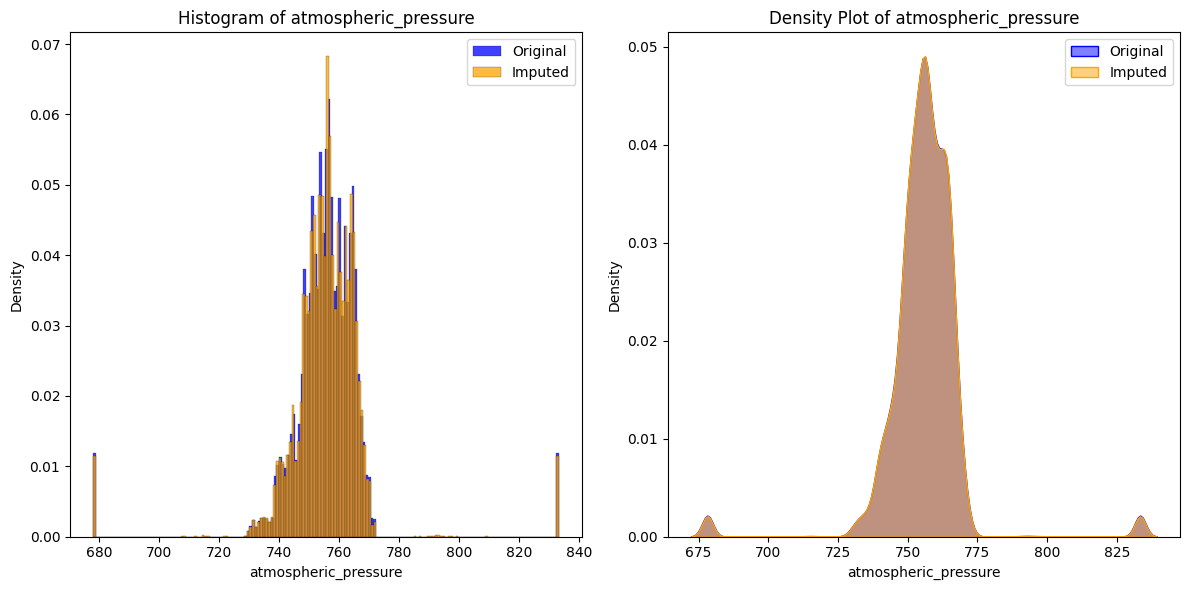

--- Descriptive Statistics for 'visibility_index' ---

Original Data:
count    15950.000000
mean        40.319352
std         17.473913
min          1.000000
25%         29.000000
50%         40.000000
75%         40.000000
max        159.606156
Name: visibility_index, dtype: float64

Imputed Data:
count    16758.000000
mean        40.342378
std         17.371578
min          1.000000
25%         29.020833
50%         40.000000
75%         40.000000
max        159.606156
Name: visibility_index, dtype: float64
--------------------------------------------------


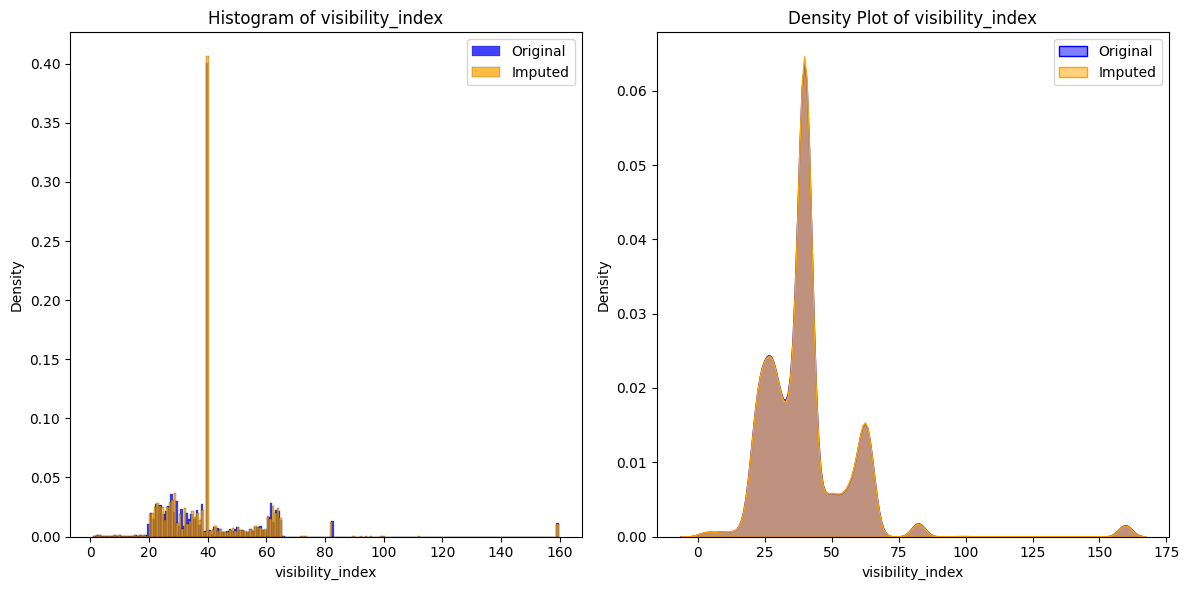

--- Descriptive Statistics for 'random_variable1' ---

Original Data:
count    15936.000000
mean        24.884268
std         26.193366
min       -120.170177
25%         12.209425
50%         24.868517
75%         37.957815
max        170.156325
Name: random_variable1, dtype: float64

Imputed Data:
count    16758.000000
mean        24.868847
std         25.900110
min       -120.170177
25%         12.438983
50%         24.860435
75%         37.672859
max        170.156325
Name: random_variable1, dtype: float64
--------------------------------------------------


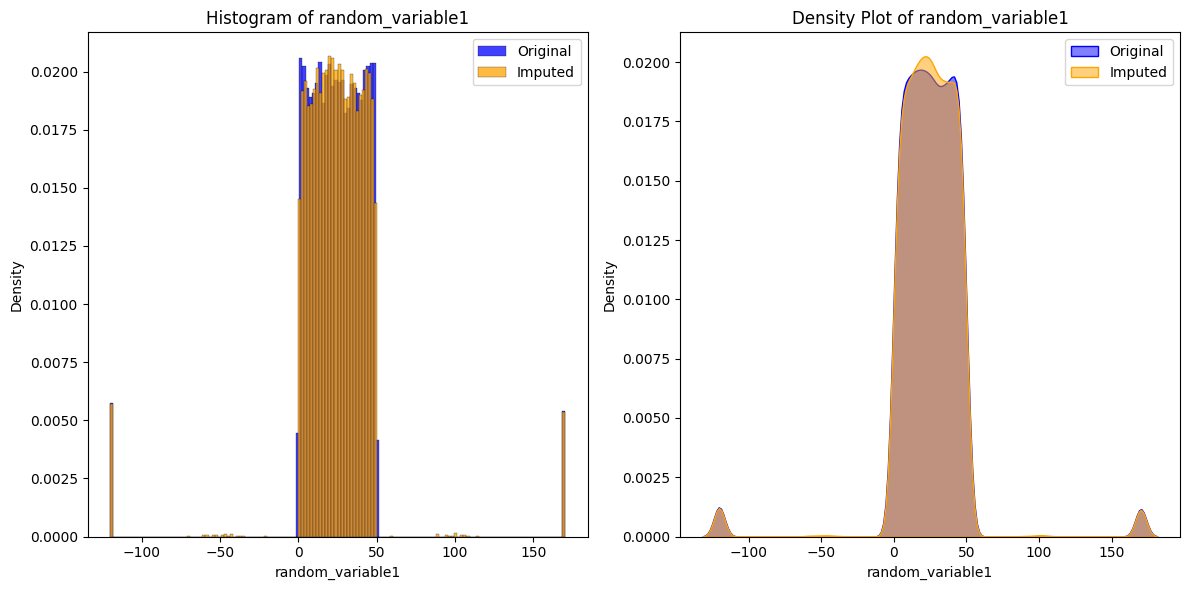

--- Descriptive Statistics for 'random_variable2' ---

Original Data:
count    15938.000000
mean        25.117787
std         25.522114
min       -120.409590
25%         12.218076
50%         24.837613
75%         37.977137
max        170.329617
Name: random_variable2, dtype: float64

Imputed Data:
count    16758.000000
mean        25.100409
std         25.187460
min       -120.409590
25%         12.460867
50%         24.791392
75%         37.684044
max        170.329617
Name: random_variable2, dtype: float64
--------------------------------------------------


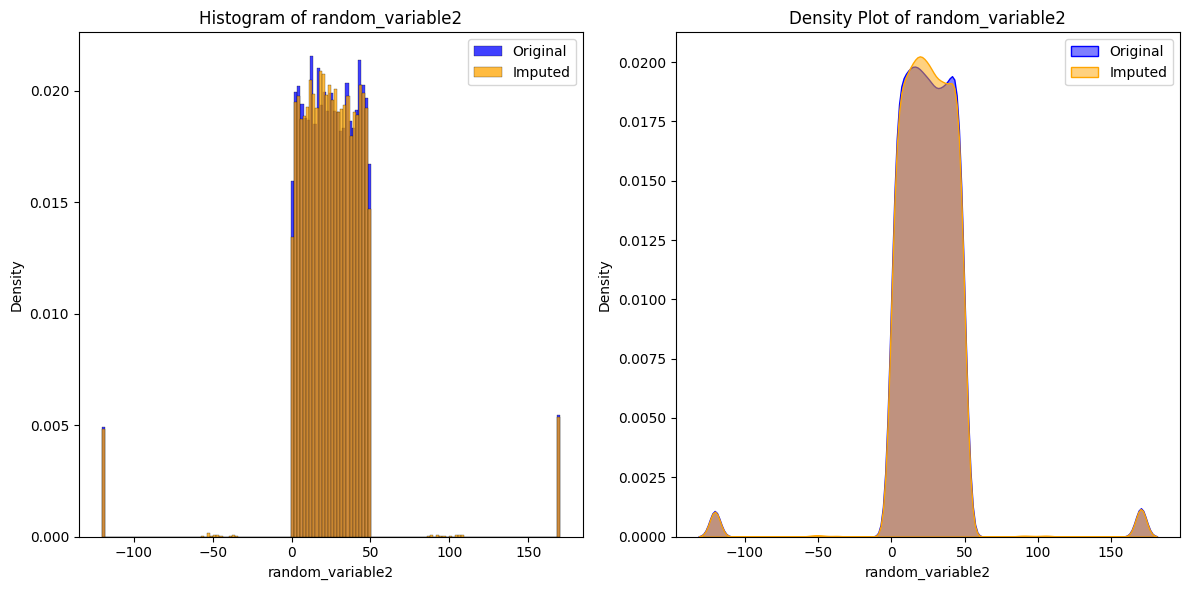

--- Descriptive Statistics for 'outdoor_humidity' ---

Original Data:
count    15966.000000
mean        81.737683
std         19.227681
min         28.000000
25%         71.666667
50%         84.500000
75%         92.000000
max        221.668765
Name: outdoor_humidity, dtype: float64

Imputed Data:
count    16758.000000
mean        81.802125
std         19.094294
min         28.000000
25%         71.833333
50%         84.500000
75%         92.000000
max        221.668765
Name: outdoor_humidity, dtype: float64
--------------------------------------------------


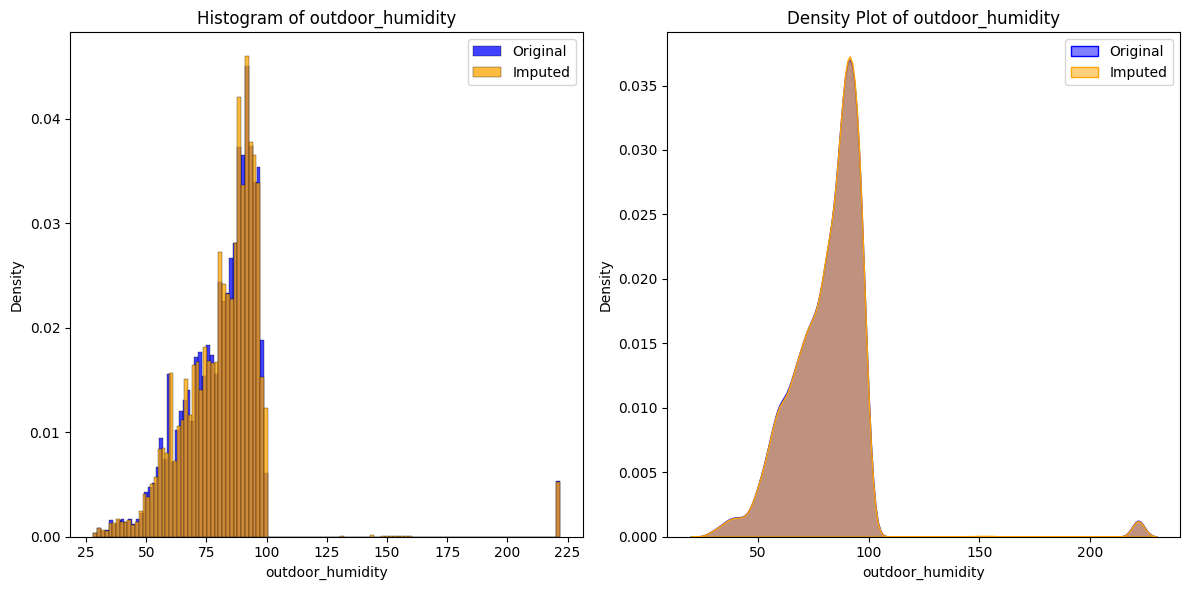

--- Descriptive Statistics for 'wind_speed' ---

Original Data:
count    15940.000000
mean         4.639958
std          3.949357
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         29.318719
Name: wind_speed, dtype: float64

Imputed Data:
count    16758.000000
mean         4.653270
std          3.927323
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         29.318719
Name: wind_speed, dtype: float64
--------------------------------------------------


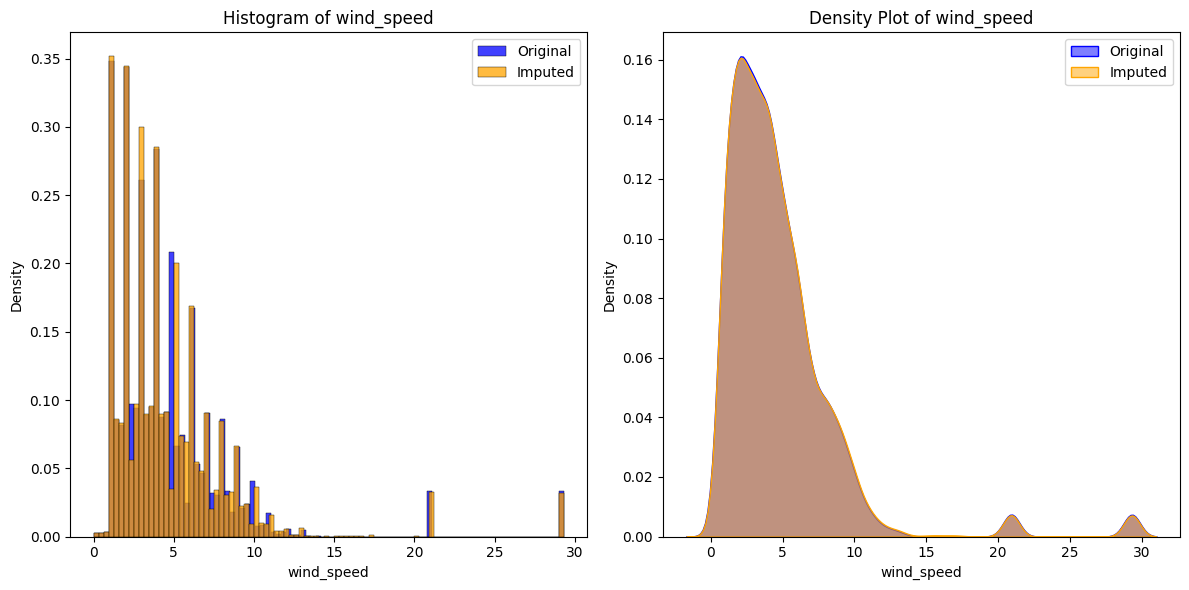

--- Descriptive Statistics for 'dew_point' ---

Original Data:
count    15935.000000
mean         2.780083
std          6.089220
min        -32.098095
25%          0.450000
50%          2.750000
75%          5.300000
max         37.673716
Name: dew_point, dtype: float64

Imputed Data:
count    16758.000000
mean         2.773156
std          6.040775
min        -32.098095
25%          0.450000
50%          2.750000
75%          5.300000
max         37.673716
Name: dew_point, dtype: float64
--------------------------------------------------


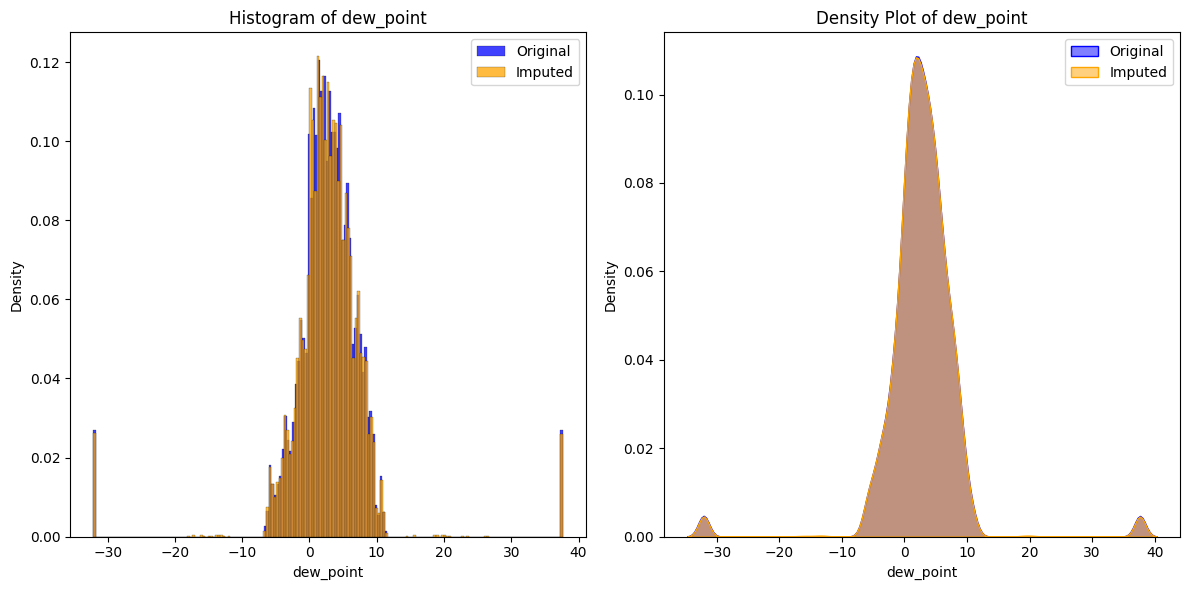

In [163]:
for feature in sensor_features:
    compare_imputation(df, df_imputed, feature)

This seems to be a good imputation as we can see that the descriptive statistics haven't changed much at all. And the plots also denote that we have almost identical distributions

In [179]:
df_imputed.isnull().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour                            0
minute        

In [164]:

def boxplots_per_hour(df, columns):
    # A. Boxplots by hour
    for col in columns:
        plt.figure(figsize=(12, 4))
        sns.boxplot(data=df, x='hour', y=col)
        plt.title(f'{col} Distribution by Hour of Day')
        plt.tight_layout()
        plt.show()

def boxplots_per_day(df, columns):
    # B. Boxplots by day of week
    for col in columns:
        plt.figure(figsize=(12, 4))
        sns.boxplot(data=df, x='dayofweek', y=col)
        plt.title(f'{col} Distribution by Day of Week')
        plt.tight_layout()
        plt.show()

def lineplot_over_time(df, columns):
    for col in columns:
        plt.figure(figsize=(15, 4))
        df[col].plot(alpha=0.5, label='Raw')
        df[col].rolling(144).mean().plot(label='Rolling Mean (1 Day)')
        plt.title(f'{col} Over Time')
        plt.xlabel("Time")
        plt.legend()
        plt.tight_layout()
        plt.show()

